In [67]:
personality_data
traits = personality_data.drop(columns = ['author']).columns

In [68]:
df_pers_merg = pd.merge(personality_data, pd.merge(df_gneri, df_tessa, on='author', how='inner'), on='author', how='inner')  # 'how' can be 'inner', 'left', 'right', or 'outer'

In [69]:
df_pers_merg = df_pers_merg[['nbr_posts','author','toxic_annotation'] + list(traits)]

In [70]:
toxic_labels = np.array(df_merged.toxic_annotation)
y = toxic_labels
y_binarized = np.array(['non-toxicity' if x == 'non-toxicity' else 'toxic' for x in y])
y = y_binarized

In [71]:
df_pers_merg['TOXICITY'] = y

In [72]:
df_pers_merg

,nbr_posts,author,toxic_annotation,long_neuroticism,long_extraversion,long_openness,long_agreeableness,long_conscientiousness,TOXICITY
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic
1,336,t2_101gwc,non-toxicity,0,0,0,0,0,non-toxicity
2,558,t2_101nfp,non-toxicity,0,0,4,3,0,non-toxicity
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic
...,...,...,...,...,...,...,...,...,...
15643,1072,t2_zykuy,vulgarity,4,3,2,0,0,toxic
15644,1231,t2_zyq04,non-toxicity,2,0,0,0,4,non-toxicity
15645,35,t2_zzfwi,non-toxicity,4,1,4,0,0,non-toxicity
15646,1320,t2_zzrbf,vulgarity,3,3,4,0,1,toxic


In [73]:
toxic_authors = df_pers_merg[df_pers_merg.TOXICITY == 'toxic']
safe_authors =  df_pers_merg[df_pers_merg.TOXICITY == 'non-toxicity']

In [74]:
toxic_authors

,nbr_posts,author,toxic_annotation,long_neuroticism,long_extraversion,long_openness,long_agreeableness,long_conscientiousness,TOXICITY
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic
7,1910,t2_102q28,vulgarity,4,0,2,2,0,toxic
8,1669,t2_102q4l,vulgarity,0,4,2,4,3,toxic
...,...,...,...,...,...,...,...,...,...
15640,874,t2_zxwos,vulgarity,0,1,2,0,0,toxic
15641,328,t2_zyj2s,vulgarity,2,1,4,0,4,toxic
15642,115,t2_zyj69,vulgarity,3,3,2,3,0,toxic
15643,1072,t2_zykuy,vulgarity,4,3,2,0,0,toxic


In [75]:
df_clustering_name = pd.read_csv('xmeans_folder_clustering/xmeans_TOXIC_NON_TOXIC_DIVISION_embeddings_CONCAT_3_LABELS.csv').drop(columns = ['Unnamed: 0'])

In [78]:
toxic_authors['CLUSTER'] = list(df_clustering_name[df_clustering_name.TOXICITY == 'toxic']['CLUSTER'])
safe_authors['CLUSTER'] = list(df_clustering_name[df_clustering_name.TOXICITY == 'non-toxicity']['CLUSTER'])

# Rename columns in toxic_authors DataFrame
toxic_authors.rename(columns={
    'long_neuroticism': 'Neurot.',
    'long_extraversion': 'Extra.',
    'long_openness': 'Openn.',
    'long_agreeableness': 'Agree.',
    'long_conscientiousness': 'Consc.'
}, inplace=True)


# Rename columns in toxic_authors DataFrame
safe_authors.rename(columns={
    'long_neuroticism': 'Neurot.',
    'long_extraversion': 'Extra.',
    'long_openness': 'Openn.',
    'long_agreeableness': 'Agree.',
    'long_conscientiousness': 'Consc.'
}, inplace=True)


toxic_authors['CLUSTER'] = toxic_authors['CLUSTER'].map({'0_tox': '1-tox', '1_tox': '2-tox', '2_tox': '3-tox'})
toxic_authors['CLUSTER'] = pd.Categorical(toxic_authors['CLUSTER'], categories=['1-tox', '2-tox', '3-tox'], ordered=True)


safe_authors['CLUSTER'] = safe_authors['CLUSTER'].map({'0_safe': '1-safe', '1_safe': '2-safe', '2_safe': '3-safe'})
safe_authors['CLUSTER'] = pd.Categorical(safe_authors['CLUSTER'], categories=['1-safe', '2-safe', '3-safe'], ordered=True)

# Mapping of short trait names to full trait names
traits_dict = {
    'Neurot.': 'Neuroticism',
    'Extra.': 'Extraversion',
    'Openn.': 'Openness',
    'Agree.': 'Agreeableness',
    'Consc.': 'Conscientiousness'
}


/tmp/ipykernel_430828/3886299593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_430828/3886299593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_430828/3886299593.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_430828/3886299593.py:15: SettingWithCopyWarning:


A va

In [80]:
toxic_authors.head()

,nbr_posts,author,toxic_annotation,Neurot.,Extra.,Openn.,Agree.,Consc.,TOXICITY,CLUSTER
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic,3-tox
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic,2-tox
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic,1-tox
7,1910,t2_102q28,vulgarity,4,0,2,2,0,toxic,3-tox
8,1669,t2_102q4l,vulgarity,0,4,2,4,3,toxic,3-tox


In [36]:
# Update the specified columns in toxic_authors based on the condition
#columns_to_update = ['long_neuroticism', 'long_extraversion', 'long_openness', 
#                     'long_agreeableness', 'long_conscientiousness']
#toxic_authors[columns_to_update] = toxic_authors[columns_to_update].applymap(lambda x: 0 if x <= 2 else 1)

# Update the specified columns in toxic_authors based on the condition
#columns_to_update = ['long_neuroticism', 'long_extraversion', 'long_openness', 
#                     'long_agreeableness', 'long_conscientiousness']
#safe_authors[columns_to_update] = safe_authors[columns_to_update].applymap(lambda x: 0 if x <= 2 else 1)

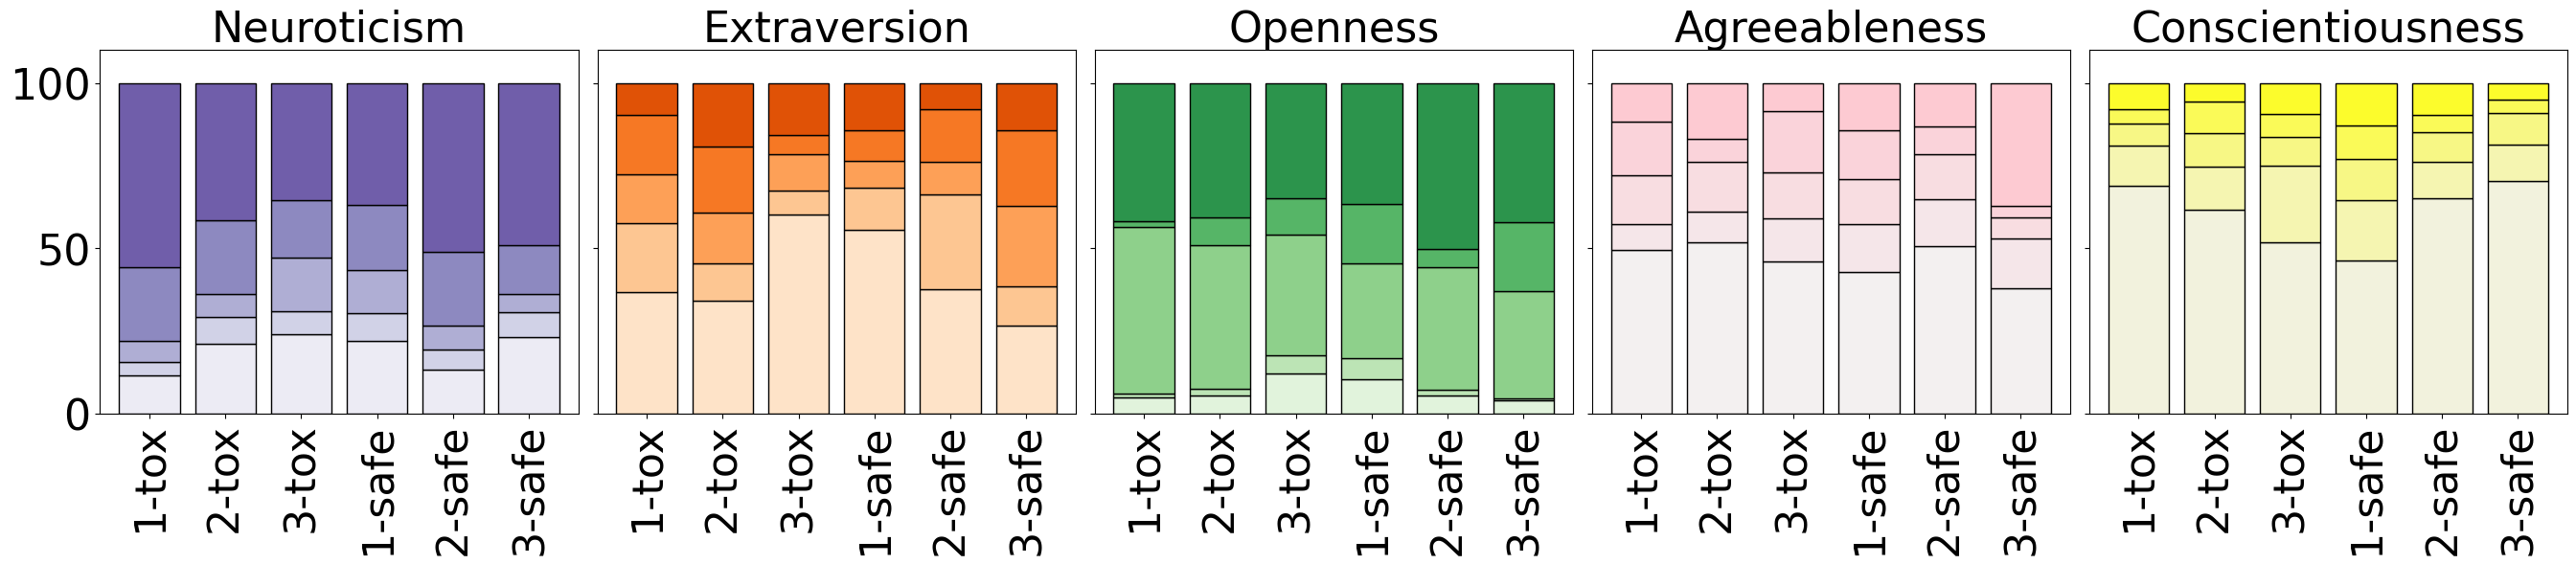

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1-tox', '2-tox', '3-tox', '1-safe', '2-safe', '3-safe']  # Define cluster names explicitly

traits_dict = {
    'Neurot.': 'Neuroticism',
    'Extra.': 'Extraversion',
    'Openn.': 'Openness',
    'Agree.': 'Agreeableness',
    'Consc.': 'Conscientiousness'
}

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a unique color palette for each trait
trait_colors = {
    'Neurot.': sns.color_palette("Purples", 6),   # Blue palette for Neuroticism
    'Extra.': sns.color_palette("Oranges", 6),  # Orange palette for Extraversion
    'Openn.': sns.color_palette("Greens", 6),   # Green palette for Openness
    'Agree.': ['#f3f0f0', '#f5e6e9', '#f8dde1', '#fad3da', '#fdcad2', '#ffc0cb'],  # Pink gradient for Agreeableness
    'Consc.': ['#f2f2dd', '#f5f5b1', '#f7f785', '#fafa58', '#fcfc2c', '#ffff00']   # Yellow gradient for Conscientiousness
}


fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 6), sharey=True)  # Slightly smaller figure size

cluster_order = ['1-tox', '2-tox', '3-tox', '1-safe', '2-safe', '3-safe']

# Loop through each trait
for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    total_counts = melted_data.groupby(['CLUSTER', 'Value']).size().reset_index(name='Counts')
  
    total_counts['Percentage'] = total_counts.groupby('CLUSTER')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
   
    pivot_data = total_counts.pivot_table(index='CLUSTER', columns='Value', values='Percentage', aggfunc='sum', fill_value=0)
    

    pivot_data = pivot_data.reindex(cluster_order)
    
    # Plot the stacked bar chart with black separators and fixed color for each value
    pivot_data.plot(
        kind='bar', stacked=True, ax=ax, color=trait_colors[trait], width=0.8, edgecolor='black', legend=False
    )
    
    # Set titles and labels
    ax.set_title(f"{traits_dict[trait]}", fontsize=32)
    ax.set_xlabel("", fontsize=32)
    if i == 0:
        ax.set_ylabel("", fontsize=30)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=32)
    ax.tick_params(axis='x', rotation=90)  # Make the x-axis tick labels horizontal

# Create the manual legend for the final plot only
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette("Blues", 4)]

# Calculate the size of each cluster
cluster_sizes = combined_authors['CLUSTER'].value_counts().reindex(cluster_order)

plt.subplots_adjust(wspace=0.3)  # Reduced space between subplots

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the legends
#fig.savefig('bar_chart_traits.png', dpi=300, bbox_inches='tight', pad_inches=0.1)  # Save with best resolution

plt.show()


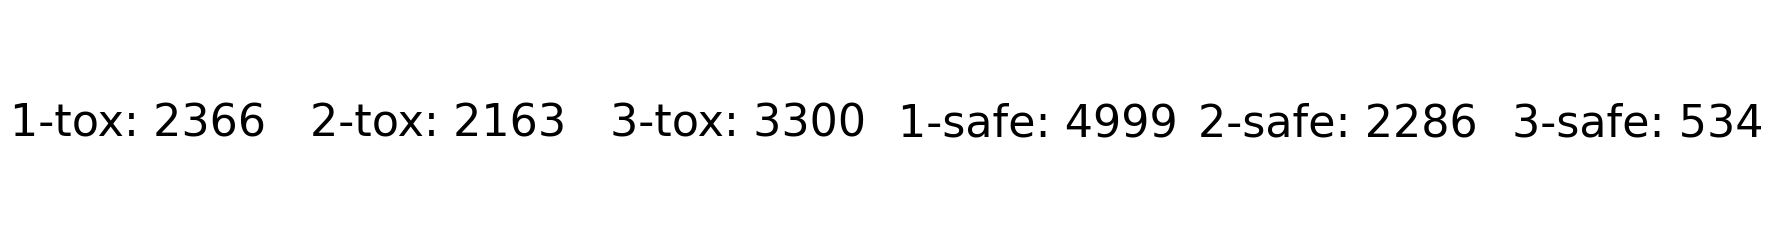

In [56]:
# Create a blank figure
fig = plt.figure(figsize=(12, 3))  # Increase the figure width

# Adjust the spacing dynamically
spacing = 1.5/ len(cluster_order)  # Spread the labels evenly across the width

# Add a fake legend below the existing one with the cluster sizes, aligned horizontally
for idx, cluster in enumerate(cluster_order):
    cluster_size = cluster_sizes.get(cluster, 0)
    # Place the text horizontally along the x-axis with adjusted spacing
    plt.text(0.2 + spacing * idx, 0.5, f"{cluster}: {cluster_size}", 
             transform=fig.transFigure, ha='center', va='center', fontsize=32, color='black')

# Adjust the layout to fit the text properly
plt.axis('off')  # Hide the axes
fig.savefig('text_sizes.png', dpi=300, bbox_inches='tight', pad_inches=0.1)  # Save with best resolution

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the OCEAN traits and toxic cluster colors
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
#color_toxic = ['#FF0000', '#FF6347', '#FF4500'] # Corrected hex color codes
#toxic_authors['CLUSTER'] = toxic_authors['CLUSTER'].map({'0_tox': '1_tox', '1_tox': '2_tox', '2_tox': '3_tox'})
#toxic_authors['CLUSTER'] = pd.Categorical(toxic_authors['CLUSTER'], categories=['1_tox', '2_tox', '3_tox'], ordered=True)


# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(25, 5), sharey=True)

for i, trait in enumerate(traits):
    ax = axes[i]
    # Melt data for the current trait
    melted_data = toxic_authors.melt(
        value_vars=[trait], id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    # Plot using the custom color palette
    sns.histplot(
        data=melted_data, x='Value', hue='CLUSTER', multiple='stack',
         shrink=0.8, ax=ax, discrete=True
    )
    ax.set_title(f"Distribution for {trait}")
    ax.set_xlabel("Trait Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox']  # Define cluster names explicitly

# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = toxic_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate percentages for each cluster at each trait value
    total_counts = melted_data.groupby(['Value', 'CLUSTER']).size().reset_index(name='Counts')
    total_counts['Percentage'] = total_counts.groupby('Value')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot the normalized stacked histogram
    sns.histplot(
        data=total_counts, x='Value', weights='Percentage', hue='CLUSTER', multiple='stack',
        shrink=0.8, ax=ax, discrete=True, legend=False  # Disable automatic legend
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Trait Values", fontsize=16)
    if i == 0:
        ax.set_ylabel("Percentage", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)

# Manually create the legend using a custom mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette(n_colors=len(clusters))]
fig.legend(
    legend_handles, clusters, title="Cluster", title_fontsize=20, fontsize=18,
    loc='center left', bbox_to_anchor=(0.95, 0.8), frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the legend
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Define the custom palette, skipping the first three default Seaborn colors
palette = sns.color_palette("Set2", len(clusters))  # "Set2" provides a range of colors
# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = safe_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate percentages for each cluster at each trait value
    total_counts = melted_data.groupby(['Value', 'CLUSTER']).size().reset_index(name='Counts')
    total_counts['Percentage'] = total_counts.groupby('Value')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot the normalized stacked histogram
    sns.histplot(
        data=total_counts, x='Value', weights='Percentage', hue='CLUSTER', multiple='stack',
        shrink=0.8, ax=ax, discrete=True, legend=False, palette=palette  # Set custom color palette
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Trait Values", fontsize=16)
    if i == 0:
        ax.set_ylabel("Percentage", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)

# Manually create the legend using a custom mapping
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
fig.legend(
    legend_handles, clusters, title="Cluster", title_fontsize=20, fontsize=18,
    loc='center left', bbox_to_anchor=(0.95, 0.8), frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the legend
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames


combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a custom color palette with the given hex colors
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD", "#5758BB"]

# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate percentages for each cluster at each trait value
    total_counts = melted_data.groupby(['Value', 'CLUSTER']).size().reset_index(name='Counts')
    total_counts['Percentage'] = total_counts.groupby('Value')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot the normalized stacked histogram
    sns.histplot(
        data=total_counts, x='Value', weights='Percentage', hue='CLUSTER', multiple='stack',
        shrink=0.8, ax=ax, discrete=True, legend=False, palette=custom_palette  # Use custom color palette
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Trait Values", fontsize=16)
    if i == 0:
        ax.set_ylabel("Percentage", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)

# Manually create the legend using the custom palette
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]
fig.legend(
    legend_handles, clusters, title="Cluster", title_fontsize=20, fontsize=18,
    loc='center left', bbox_to_anchor=(0.95, 0.8), frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the legend
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a custom color palette with the given hex colors
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD", "#5758BB"]

# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate absolute counts (frequency) for each cluster at each trait value
    total_counts = melted_data.groupby(['Value', 'CLUSTER']).size().reset_index(name='Counts')
    
    # Plot the stacked histogram with absolute counts (no normalization to percentages)
    sns.histplot(
        data=total_counts, x='Value', weights='Counts', hue='CLUSTER', multiple='stack',
        shrink=0.8, ax=ax, discrete=True, legend=False, palette=custom_palette  # Use custom color palette
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Trait Values", fontsize=16)
    if i == 0:
        ax.set_ylabel("Frequency", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, total_counts['Counts'].max() + 7000)  # Set y-axis from 0 to the max frequency
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)

# Manually create the legend using the custom palette
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]
fig.legend(
    legend_handles, clusters, title="Cluster", title_fontsize=20, fontsize=18,
    loc='center left', bbox_to_anchor=(0.95, 0.8), frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the legend
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a custom color palette with the given hex colors
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD", "#5758BB"]

# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

# Loop through each trait
for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate raw counts for each cluster at each trait value
    total_counts = melted_data.groupby(['CLUSTER', 'Value']).size().reset_index(name='Counts')
    
    # Create a pivot table to rearrange the data for stacked plotting
    pivot_data = total_counts.pivot_table(index='CLUSTER', columns='Value', values='Counts', aggfunc='sum', fill_value=0)
    
    # Plot the stacked bar chart with black separators
    pivot_data.plot(
        kind='bar', stacked=True, ax=ax, color=custom_palette, width=0.8, edgecolor='black', legend=False
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Cluster", fontsize=16)
    if i == 0:
        ax.set_ylabel("Number of Authors", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, pivot_data.sum(axis=1).max() + 200)  # Set y-axis based on the max value across all clusters
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)
    ax.tick_params(axis='x', rotation=0)  # Make the x-axis tick labels horizontal

# Create the manual legend for the final plot only
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]

fig.legend(
    legend_handles, ['0', '1', '2', '3', '4'],  # Personality trait values as labels
    title="Personality Value", title_fontsize=14, fontsize=12,
    loc='center left', bbox_to_anchor=(0.90, 0.8), frameon=False
)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the legend
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a custom color palette with the given hex colors
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD", "#5758BB"]

# Create subplots for each trait
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 5), sharey=True)

# Define the correct order of clusters (tox first, then safe)
cluster_order = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']

# Loop through each trait
for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    # Calculate raw counts for each cluster at each trait value
    total_counts = melted_data.groupby(['CLUSTER', 'Value']).size().reset_index(name='Counts')
    
    # Normalize counts to percentage (sum within each cluster)
    total_counts['Percentage'] = total_counts.groupby('CLUSTER')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Create a pivot table to rearrange the data for stacked plotting
    pivot_data = total_counts.pivot_table(index='CLUSTER', columns='Value', values='Percentage', aggfunc='sum', fill_value=0)
    
    # Reorder the pivot data according to the cluster_order
    pivot_data = pivot_data.reindex(cluster_order)
    
    # Plot the stacked bar chart with black separators
    pivot_data.plot(
        kind='bar', stacked=True, ax=ax, color=custom_palette, width=0.8, edgecolor='black', legend=False
    )
    
    # Set titles and labels
    ax.set_title(f"Trait: {trait}", fontsize=18)
    ax.set_xlabel("Cluster", fontsize=16)
    if i == 0:
        ax.set_ylabel("Percentage (%)", fontsize=16)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)
    ax.tick_params(axis='x', rotation=0)  # Make the x-axis tick labels horizontal

# Create the manual legend for the final plot only
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette]

fig.legend(
    legend_handles, ['0', '1', '2', '3', '4'],  # Personality trait values as labels
    title="Personality Value", title_fontsize=20, fontsize=18,
    loc='center left', bbox_to_anchor=(0.86, 0.8), frameon=False
)

# Calculate the size of each cluster
cluster_sizes = combined_authors['CLUSTER'].value_counts().reindex(cluster_order)

# Add a fake legend below the existing one with the cluster sizes
for idx, cluster in enumerate(cluster_order):
    cluster_size = cluster_sizes.get(cluster, 0)
    plt.text(0.877, 0.46 - 0.05 * idx, f"{cluster}: {cluster_size}", 
             transform=fig.transFigure, ha='left', va='center', fontsize=18)

# Adjust layout to make space for the legends
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the legends
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Group by 'CLUSTER' and compute the counts of each value for each trait
value_counts = (
    combined_authors.melt(id_vars=['CLUSTER'], value_vars=traits, var_name='Trait', value_name='Value')
    .groupby(['CLUSTER', 'Trait', 'Value'])
    .size()
    .unstack(fill_value=0)  # Pivot the values for stacking
)

# Define a custom color palette for the trait values (0-4)
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD"]  # Colors for 0, 1, 2, 3, 4

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(30, 6), sharey=True)

# Loop through each cluster and plot a stacked bar chart
for i, cluster in enumerate(clusters):
    ax = axes[i]
    
    # Select data for the current cluster
    cluster_data = value_counts.loc[cluster]
    
    # Plot stacked bar chart
    bottom_values = None
    for value, color in enumerate(custom_palette):
        ax.bar(
            traits, cluster_data[value], bottom=bottom_values,
            color=color, edgecolor='black', label=str(value) if i == 0 else ""
        )
        # Update the bottom values for stacking
        if bottom_values is None:
            bottom_values = cluster_data[value]
        else:
            bottom_values += cluster_data[value]
    
    # Set titles and labels
    ax.set_title(f"Cluster: {cluster}", fontsize=18)
    ax.set_xlabel("Personality Traits", fontsize=16)
    if i == 0:
        ax.set_ylabel("Number of Authors", fontsize=16)
    else:
        ax.set_ylabel("")
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)
    ax.tick_params(axis='x', rotation=0)  # Keep x-axis labels horizontal
    
    # Set y-axis limit to ensure consistent scale across plots
    ax.set_ylim(0, value_counts.values.max() + 200)

# Add a legend for the trait values
fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette],
    labels=['0', '1', '2', '3', '4'], title="Trait Values", title_fontsize=16, fontsize=14,
    loc='center right', bbox_to_anchor=(1.005, 0.8), frameon=False
)

# Adjust layout to make space for all subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1_tox', '2_tox', '3_tox', '1_safe', '2_safe', '3_safe']  # Define cluster names explicitly

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Group by 'CLUSTER' and compute the counts of each value for each trait
value_counts = (
    combined_authors.melt(id_vars=['CLUSTER'], value_vars=traits, var_name='Trait', value_name='Value')
    .groupby(['CLUSTER', 'Trait', 'Value'])
    .size()
    .unstack(fill_value=0)  # Pivot the values for stacking
)

# Calculate cluster sizes
cluster_sizes = combined_authors['CLUSTER'].value_counts()

# Normalize value_counts by cluster size to compute percentages
value_percentages = value_counts.div(cluster_sizes, axis=0) * 100  # Convert to percentages

# Define a custom color palette for the trait values (0-4)
custom_palette = ["#EA2027", "#F79F1F", "#D980FA", "#12CBC4", "#0652DD"]  # Colors for 0, 1, 2, 3, 4

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(30, 6), sharey=True)

# Loop through each cluster and plot a stacked bar chart
for i, cluster in enumerate(clusters):
    ax = axes[i]
    
    # Select data for the current cluster
    cluster_data = value_percentages.loc[cluster]
    
    # Plot stacked bar chart
    bottom_values = None
    for value, color in enumerate(custom_palette):
        ax.bar(
            traits, cluster_data[value], bottom=bottom_values,
            color=color, edgecolor='black', label=str(value) if i == 0 else ""
        )
        # Update the bottom values for stacking
        if bottom_values is None:
            bottom_values = cluster_data[value]
        else:
            bottom_values += cluster_data[value]
    
    # Set titles and labels
    ax.set_title(f"Cluster: {cluster}", fontsize=18)
    ax.set_xlabel("Personality Traits", fontsize=16)
    if i == 0:
        ax.set_ylabel("Percentage of Authors (%)", fontsize=16)
    else:
        ax.set_ylabel("")
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=14)
    ax.tick_params(axis='x', rotation=0)  # Keep x-axis labels horizontal
    
    # Set y-axis limit to ensure consistent scale across plots
    ax.set_ylim(0, 100)

# Add a legend for the trait values
fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette],
    labels=['0', '1', '2', '3', '4'], title="Trait Values", title_fontsize=16, fontsize=14,
    loc='center right', bbox_to_anchor=(1.005, 0.8), frameon=False
)

# Adjust layout to make space for all subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique clusters
clusters = toxic_authors['CLUSTER'].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 5), sharey=True)

for i, cluster in enumerate(clusters):
    
    ax = axes[i]
    cluster_data = toxic_authors[toxic_authors['CLUSTER'] == cluster]
    melted_data = cluster_data.melt(
        value_vars=['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.'],
        var_name='Trait', value_name='Value'
    )
    sns.histplot(
        data=melted_data, x='Value', hue='Trait', multiple='dodge',
        palette="tab10", shrink=0.8, ax=ax, discrete=True
    )
    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Personality Trait Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique clusters
clusters = sorted(toxic_authors['CLUSTER'].unique())

# Define the trait labels and their colors
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
palette = sns.color_palette("tab10", len(traits))

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 5), sharey=True)

for i, cluster in enumerate(clusters):
    ax = axes[i]
    cluster_data = toxic_authors[toxic_authors['CLUSTER'] == cluster]
    
    # Melt the data for easier plotting
    melted_data = cluster_data.melt(
        value_vars=traits,
        var_name='Trait', value_name='Value'
    )
    
    # Calculate percentages within each Value
    total_counts = melted_data.groupby(['Value', 'Trait']).size().reset_index(name='Counts')
    total_counts['Percentage'] = total_counts.groupby('Value')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot the normalized stacked histogram
    sns.histplot(
        data=total_counts, x='Value', weights='Percentage', hue='Trait', multiple='stack',
        palette=palette, shrink=0.8, ax=ax, discrete=True,
        legend=False if i < len(clusters) - 1 else True  # Disable legend for all except the last plot
    )
    
    # Set titles and labels
    ax.set_title(f"Cluster {str(i+1)  + cluster[1:]}", fontsize=18)
    ax.set_xlabel("Personality Trait Value", fontsize=18)
    ax.set_ylabel("Percentage", fontsize=18)
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=20)  # Font size for x-ticks and y-ticks
    
    # Add legend manually for the last subplot
    if i == len(clusters) - 1:
        handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
        ax.legend(handles, traits, fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', title="Trait", title_fontsize=18, frameon=False)


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique clusters
clusters = sorted(safe_authors['CLUSTER'].unique())

# Define the trait labels and their colors
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
palette = sns.color_palette("tab10", len(traits))

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 5), sharey=True)

for i, cluster in enumerate(clusters):
    ax = axes[i]
    cluster_data = safe_authors[safe_authors['CLUSTER'] == cluster]
    
    # Melt the data for easier plotting
    melted_data = cluster_data.melt(
        value_vars=traits,
        var_name='Trait', value_name='Value'
    )
    
    # Calculate percentages within each Value
    total_counts = melted_data.groupby(['Value', 'Trait']).size().reset_index(name='Counts')
    total_counts['Percentage'] = total_counts.groupby('Value')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot the normalized stacked histogram
    sns.histplot(
        data=total_counts, x='Value', weights='Percentage', hue='Trait', multiple='stack',
        palette=palette, shrink=0.8, ax=ax, discrete=True,
        legend=False if i < len(clusters) - 1 else True  # Disable legend for all except the last plot
    )
    
    # Set titles and labels
    ax.set_title(f"Cluster {str(i+1)  + cluster[1:]}", fontsize=18)
    ax.set_xlabel("Personality Trait Value", fontsize=18)
    ax.set_ylabel("Percentage", fontsize=18)
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=20)  # Font size for x-ticks and y-ticks
    
    # Add legend manually for the last subplot
    if i == len(clusters) - 1:
        handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
        ax.legend(handles, traits, fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', title="Trait", title_fontsize=18, frameon=False)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique clusters
clusters = safe_authors['CLUSTER'].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 5), sharey=True)

for i, cluster in enumerate(clusters):
    ax = axes[i]
    cluster_data = safe_authors[safe_authors['CLUSTER'] == cluster]
    melted_data = cluster_data.melt(
        value_vars=['long_neuroticism', 'long_extraversion', 'long_openness', 'long_agreeableness', 'long_conscientiousness'],
        var_name='Trait', value_name='Value'
    )
    sns.histplot(
        data=melted_data, x='Value', hue='Trait', multiple='dodge',
        palette="tab10", shrink=0.8, ax=ax, discrete=True,
    )
    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Personality Trait Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique clusters
clusters = safe_authors['CLUSTER'].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(20, 5), sharey=True)

for i, cluster in enumerate(clusters):
    ax = axes[i]
    cluster_data = safe_authors[safe_authors['CLUSTER'] == cluster]
    cluster_size = len(cluster_data)  # Total size of the cluster
    melted_data = cluster_data.melt(
        value_vars=['long_neuroticism', 'long_extraversion', 'long_openness', 'long_agreeableness', 'long_conscientiousness'],
        var_name='Trait', value_name='Value'
    )
    sns.histplot(
        data=melted_data, x='Value', hue='Trait', multiple='dodge',
        palette="tab10", shrink=0.8, ax=ax, discrete=True,
        stat='density'  # Use density to enable manual scaling to percentages
    )
    # Convert density to percentage
    for patch in ax.patches:
        patch.set_height(patch.get_height() * 100)
    
    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Personality Trait Value")
    ax.set_ylabel("Percentage")
    ax.set_ylim(0, 20)  # Set y-axis from 0% to 20%

plt.tight_layout()
plt.show()


### Radar plot for toxic and non toxic users

In [3]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from interpret.glassbox import ExplainableBoostingClassifier

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import warnings
np.warnings = warnings

from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.silhouette import silhouette
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold


# In[4]:


import pandas as pd
from datasets import load_dataset

# Define the targets and an empty dictionary to store dataframes
targets = ['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness']

dataframes = {}

# Load each dataset and select the 'author' and target column
for target in targets:
    data = load_dataset(f"PwNzDust/{target}_user_preds")['train'] #prediction obtaine dwith longformer models and private
    dataframes[target] = data.select_columns(['author', target])  # Efficient column selection

personality_data = pd.DataFrame()
for target in targets:
    if personality_data.empty:
        personality_data = dataframes[target].to_pandas()  # Initialize with the first target
    else:
        personality_data = pd.merge(personality_data, dataframes[target].to_pandas(), on='author', how='inner')


personality_data.columns = ['long_' + col if col != 'author' else col for col in personality_data.columns]

Found cached dataset parquet (/home/acascione/.cache/huggingface/datasets/PwNzDust___parquet/PwNzDust--neuroticism_user_preds-ce2e3310e0017344/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (/home/acascione/.cache/huggingface/datasets/PwNzDust___parquet/PwNzDust--extraversion_user_preds-61dfb36a79d2102a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (/home/acascione/.cache/huggingface/datasets/PwNzDust___parquet/PwNzDust--openness_user_preds-e0cfb26d013b3401/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (/home/acascione/.cache/huggingface/datasets/PwNzDust___parquet/PwNzDust--agreeableness_user_preds-80b1aec60a21b78a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (/home/acascione/.cache/huggingface/datasets/PwNzDust___parquet/PwNzDust--conscientiousness_user_preds-be1a03153ca30abe/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

(15648, 381) (15648, 194)


In [ ]:
df_merged = pd.read_csv('df_feats_clusters.csv') 

In [5]:
# Load the CSV data
df = pd.read_csv('EGB_results/EGB_k_fold_crossval_results_xmeans_TOXIC_NON_TOXIC_DIVISION_clustering_CONCAT_3_LABELS.csv_CORRECT.csv')
sorted_df = df.sort_values(by='mean_test_f1_weighted', ascending=False)
best_result = sorted_df.iloc[0]
best_result.params           

"{'learning_rate': 0.01, 'max_leaves': 3, 'n_jobs': 4, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'smoothing_rounds': 200}"

In [6]:
df_embeddings = pd.read_csv('INTERPRETABLE_xmeans_TOXIC_NON_TOXIC_DIVISION_embeddings_CONCAT_3.csv')
df_interpretable = pd.read_csv('INTERPRETABLE_xmeans_TOXIC_NON_TOXIC_DIVISION_interpretable_CONCAT.csv')

In [7]:
df_int = df_interpretable.drop(columns = ['CLUSTER','TOXICITY'])
df_int.columns = cols

In [11]:
X = df_int.values
y = np.array(df_interpretable.CLUSTER)

In [12]:
dict_classes = {'0_safe' : 0, '0_tox' : 1, '1_safe' : 2, '1_tox': 3, '2_safe' : 4, '2_tox' : 5}

In [13]:
X = df_int.values
y = np.array([dict_classes[x] for x in df_interpretable.CLUSTER])

In [14]:
best_conf = {'learning_rate': 0.01, 'max_leaves': 3, 'n_jobs': 4, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'smoothing_rounds': 200}
exp_model = ExplainableBoostingClassifier(**best_conf, feature_names  = [col for col in cols if col not in [x for x in cols if 'tox' in x] + ['perc'] + [x for x in cols if 'cluster' in x]])

In [ ]:
exp_model.fit(X,y)



In [16]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

In [17]:
global_exp_object = exp_model.explain_global()

In [18]:
#dir(global_exp_object._internal_obj)

In [19]:
global_exp_object._internal_obj.keys()

dict_keys(['overall', 'specific', 'mli'])

In [20]:
global_feats = [(f,s) for f, s in zip(global_exp_object._internal_obj['overall']['names'],global_exp_object._internal_obj['overall']['scores'])]

In [21]:
#global_feats

In [22]:
global_feats = sorted(global_feats, key=lambda x: x[1], reverse=True)
global_feats

global_top_feats = [x[0] for x in global_feats[0:10]]

In [23]:
global_top_feats

['insult_sum',
 'obscene_sum',
 'politic',
 'polarity_sum',
 'swear',
 'nbr_posts',
 'fuck_sum',
 'identity_attack_sum',
 'positive_sum',
 'Culture']

In [24]:
#show(exp_model.explain_global())

In [25]:
import numpy as np
from scipy.spatial.distance import cdist

medoids = {}
for cluster in sorted(list(set(df_embeddings.CLUSTER))):
    break
    print(f"Cluster {cluster}")
    df_temp = df_embeddings[df_embeddings.CLUSTER == cluster].drop(columns=['CLUSTER', 'TOXICITY'])
    index = df_temp.index
    distances = cdist(df_temp.values, df_temp.values, metric='euclidean')
    sum_distances = distances.sum(axis=1)
    medoid_index = np.argmin(sum_distances)
    
    medoid_index_original = index[medoid_index]
    medoids[cluster] = medoid_index_original



In [26]:
medoids_concat_embeddings = {'0_safe': 11461, '0_tox': 5255, '1_safe': 9277, '1_tox': 4177, '2_safe': 15621, '2_tox': 3384}

In [30]:
local_exp = exp_model.explain_local(X_selected, y_selected, 0)

In [27]:
indices = np.array(list(medoids_concat_embeddings.values()))  # Convert to an array of indices
X_selected = X[indices]
y_selected = y[indices]
y_selected

array([0, 1, 2, 3, 4, 5])

### Global feats plot

In [31]:
cluster_scores_intercept_safe = {}
cluster_scores_intercept_toxic = {}

for i_cluster, cluster_name in enumerate(list(medoids_concat_embeddings.keys())):
    print(cluster_name)
    xai_dict = local_exp._internal_obj['specific'][i_cluster]
    scores = xai_dict['scores']
    names = xai_dict['names']
    sorted_data = sorted(zip(scores, names), key=lambda x: x[0][i_cluster], reverse=True)
    scores, names = zip(*sorted_data)

    ##addon

    #names = [x for x in names if any(emotion in x for emotion in emotions)]
    names = [x for x in names if x in global_top_feats]

    if 'saf' in cluster_name:
        cluster_scores_intercept_safe[cluster_name]  =  set(names)
    else:
        cluster_scores_intercept_toxic[cluster_name]  =  set(names)
        

    # Update the xai_dict with sorted scores and names
    #xai_dict['scores'] = list(scores)
    #xai_dict['names'] = list(names)

    # Store in cluster_scores_intercept or use as needed
    #cluster_scores_intercept[cluster_name] = xai_dict

    

0_safe
0_tox
1_safe
1_tox
2_safe
2_tox


In [32]:
cluster_scores_intercept_safe, cluster_scores_intercept_toxic

({'0_safe': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',
   'obscene_sum',
   'polarity_sum',
   'politic',
   'positive_sum',
   'swear'},
  '1_safe': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',
   'obscene_sum',
   'polarity_sum',
   'politic',
   'positive_sum',
   'swear'},
  '2_safe': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',
   'obscene_sum',
   'polarity_sum',
   'politic',
   'positive_sum',
   'swear'}},
 {'0_tox': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',
   'obscene_sum',
   'polarity_sum',
   'politic',
   'positive_sum',
   'swear'},
  '1_tox': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',
   'obscene_sum',
   'polarity_sum',
   'politic',
   'positive_sum',
   'swear'},
  '2_tox': {'Culture',
   'fuck_sum',
   'identity_attack_sum',
   'insult_sum',
   'nbr_posts',

In [33]:
intersect_safe = list(cluster_scores_intercept_safe.values())[0]
for val in list(cluster_scores_intercept_safe.values()):
    intersect_safe  = intersect_safe  |  val

intersect_toxic = list(cluster_scores_intercept_toxic.values())[0]
for val in list(cluster_scores_intercept_toxic.values()):
    intersect_toxic  = intersect_toxic | val

In [34]:
intersect_safe, intersect_toxic

({'Culture',
  'fuck_sum',
  'identity_attack_sum',
  'insult_sum',
  'nbr_posts',
  'obscene_sum',
  'polarity_sum',
  'politic',
  'positive_sum',
  'swear'},
 {'Culture',
  'fuck_sum',
  'identity_attack_sum',
  'insult_sum',
  'nbr_posts',
  'obscene_sum',
  'polarity_sum',
  'politic',
  'positive_sum',
  'swear'})

In [35]:
intersect_toxic = {item for item in intersect_toxic if 'fuckin' not in item}

In [36]:
intersect = intersect_toxic | intersect_safe
intersect

{'Culture',
 'fuck_sum',
 'identity_attack_sum',
 'insult_sum',
 'nbr_posts',
 'obscene_sum',
 'polarity_sum',
 'politic',
 'positive_sum',
 'swear'}

In [37]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np

cluster_scores_radaer = {}
for i_cluster, cluster_name in enumerate(list(medoids_concat_embeddings.keys())):
    print(cluster_name)
    xai_dict = local_exp._internal_obj['specific'][i_cluster]
    scores = xai_dict['scores']
    names = xai_dict['names']
    #best_feat_local = {name : score[i_cluster] for name, score in zip(names,scores) if name in global_top_feats}

    #using intersect feats instead
    
    best_feat_local = {name : score[i_cluster] for name, score in zip(names,scores) if name in intersect}

    
    #best_feat_local = {k + '   ' if k == 'polarity_sum' else k: v for k, v in best_feat_local.items()}

    cluster_scores_radaer[cluster_name] = best_feat_local
        



0_safe
0_tox
1_safe
1_tox
2_safe
2_tox


In [39]:
#cluster_scores_radaer

In [40]:
best_feat_local = {name : score for name, score in zip(names,scores) if name in global_top_feats}

In [41]:
#best_feat_local

In [42]:
# Define cluster names with relative sizes
cluster_names_safe = {
    '0_safe': '1-safe Constructive 31.94%',
    '1_safe': '2-safe Contentious 14.60%',
    '2_safe': '3-safe Neutral 3.40%'
}

cluster_names_toxic = {
    '0_tox': '1-tox Aggressive 15.12%',
    '1_tox': '2-tox Provocative 13.82%',
    '2_tox': '3-tox Mildly-Toxic 21.08%'
}

# Determine the maximum string length
all_names = list(cluster_names_safe.values()) + list(cluster_names_toxic.values())
max_length = max(len(name) for name in all_names)

# Function to pad strings to the same length
def pad_to_length(name, length):
    return name.ljust(length)

# Adjust all names to have the same length
cluster_names_safe_fixed = {key: pad_to_length(value, max_length) for key, value in cluster_names_safe.items()}
cluster_names_toxic_fixed = {key: pad_to_length(value, max_length) for key, value in cluster_names_toxic.items()}

# Print to check the result
print("Safe clusters (fixed length):")
print(cluster_names_safe_fixed)
print("\nToxic clusters (fixed length):")
print(cluster_names_toxic_fixed)


Safe clusters (fixed length):
{'0_safe': '1-safe Constructive 31.94%', '1_safe': '2-safe Contentious 14.60% ', '2_safe': '3-safe Neutral 3.40%      '}

Toxic clusters (fixed length):
{'0_tox': '1-tox Aggressive 15.12%   ', '1_tox': '2-tox Provocative 13.82%  ', '2_tox': '3-tox Mildly-Toxic 21.08% '}


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Define labels for the radar plot
labels = ['nbr_posts', 'obscene_sum', 'insult_sum', 'identity_attack_sum', 'positive_sum', 
          'Culture', 'fuck_sum', 'swear', 'polarity_sum', 'politic']

# Define cluster names with relative sizes
cluster_names_safe = {
    '0_safe': '1-safe Constructive (31.94%)',
    '1_safe': '2-safe Contentious (14.60%)',
    '2_safe': '3-safe Neutral (3.40%)'
}

cluster_names_toxic = {
    '0_tox': '1-tox Aggressive (15.12%)',
    '1_tox': '2-tox Provocative (13.82%)',
    '2_tox': '3-tox Mildly-Toxic (21.08%)'
}

# Function to scale data
def scale_data_to_range(data_dict, min_val=-1.5, max_val=1.5):
    """
    Scales the values in the dictionary to a specific range [-1.5, 1.5].
    """
    all_values = [value for sub_dict in data_dict.values() for value in sub_dict.values()]
    global_min, global_max = min(all_values), max(all_values)
    
    scaled_dict = {}
    for outer_key, inner_dict in data_dict.items():
        scaled_dict[outer_key] = {
            key: ((val - global_min) / (global_max - global_min)) * (max_val - min_val) + min_val
            for key, val in inner_dict.items()
        }
    return scaled_dict

# Function to format legend names
def format_legend_name(name, cluster_names):
    """
    Format the legend name using cluster names.
    """
    return cluster_names[name]

# Function to plot radar chart
def radar_chart(data_dict, color_shades, title, ax, cluster_names):
    """
    Plots a radar chart for the given dictionary of data.
    """
    categories = list(data_dict.values())[0].keys()
    N = len(categories)

    # Compute angles for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the circle

    # Define different markers
    markers = ['o', 's', '^']  # Circle, square, triangle

    for i, (key, values) in enumerate(data_dict.items()):
        # Get the values and append the first one to close the circle
        values_list = list(values.values()) + [list(values.values())[0]]
        
        # Plot the data with different markers for each line
        ax.plot(angles, values_list, color=color_shades[i], linewidth=3, linestyle='solid', 
                marker=markers[i], markersize=16, label=format_legend_name(key, cluster_names))
        ax.fill(angles, values_list, color=color_shades[i], alpha=0.25)

    # Add title, labels, and formatting
    ax.tick_params(pad=42)  # Increase the distance between tick labels and axis
    ax.set_title(title, size=30, color='black', y=1.2)  # Increase 'y' to move the title further up
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=26)
    
    yticks = np.linspace(-1.0, 1.0, 5)  # Generate 5 ticks
    selected_yticks = [yticks[0], yticks[len(yticks)//2], yticks[-1]]
    ax.set_yticks(yticks)
    yticklabels = [f"{tick:.1f}" if tick in selected_yticks else "" for tick in yticks]
    ax.set_yticklabels(yticklabels, fontsize=22)
    ax.set_ylim(-1.2, 1.2)

    # Customizing the legend
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(data_dict), 
                       frameon=False, fontsize=18)
    for line in legend.get_lines():
        line.set_linewidth(4)

# Colors
color_safe = ['#00478E', '#3366cc', '#99ccff']
color_toxic = ['#C80000', '#ff0000', '#ff6666']


In [45]:
#cluster_scores_radaer

In [46]:
data_safe_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'saf' in k})
data_tox_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'tox' in k})

In [47]:
# Define the radar plot labels
labels = ['nbr_posts', 'obscene_sum', 'insult_sum', 'identity_attack_sum', 'positive_sum', 
          'Culture', 'fuck_sum', 'swear', 'polarity_sum', 'politic']

# Define custom order for specific keys
first_group_order = ['polarity_sum','identity_attack_sum', 'Culture', 'fuck_sum', 'politic', 'nbr_posts','obscene_sum','insult_sum','swear','positive_sum']

def reorder_keys(data_dict, first_group_order, full_labels):
    """
    Reorders keys in the data dictionary based on a custom order, followed by remaining labels.
    """
    reordered_data = {}
    for key, sub_dict in data_dict.items():
        # Start with the custom order
        reordered_sub_dict = {}
        for k in first_group_order:
            if k in sub_dict:
                reordered_sub_dict[k] = sub_dict[k]
        
        # Append the remaining labels in their original order
        for k in full_labels:
            if k not in first_group_order and k in sub_dict:
                reordered_sub_dict[k] = sub_dict[k]
        
        reordered_data[key] = reordered_sub_dict
    return reordered_data

In [48]:
data_safe_reordered = reorder_keys({k:v for k, v in cluster_scores_radaer.items() if 'saf' in k},first_group_order, labels)
data_tox_reordered = reorder_keys({k:v for k, v in cluster_scores_radaer.items() if 'tox' in k},first_group_order, labels)

#data_safe_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'saf' in k})
#data_tox_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'tox' in k})

In [50]:
#data_safe_reordered

In [51]:
#data_tox_reordered

In [52]:
import numpy as np

# Combine the dictionaries
all_data = {**data_safe_reordered, **data_tox_reordered}

# Flatten the values to find the global min and max
all_values = [value for cluster in all_data.values() for value in cluster.values()]
global_min, global_max = min(all_values), max(all_values)

# Normalize all data to the range [-1, 1]
normalized_data = {
    cluster: {key: 2 * (value - global_min) / (global_max - global_min) - 1 for key, value in metrics.items()}
    for cluster, metrics in all_data.items()
}

# Separate back into two dictionaries based on the cluster names
normalized_safe_data = {k: v for k, v in normalized_data.items() if 'safe' in k}
normalized_tox_data = {k: v for k, v in normalized_data.items() if 'tox' in k}

# Now you have normalized_safe_data and normalized_tox_data with values in the range [-1, 1]


In [53]:
data_safe_reordered = normalized_safe_data
data_tox_reordered = normalized_tox_data

In [54]:
data_safe_reordered

{'0_safe': {'polarity_sum': 0.6009283971631214,
  'identity_attack_sum': -0.13445852062527097,
  'Culture': 0.12142179329110414,
  'fuck_sum': -0.08810564844805169,
  'politic': 0.20042687574166096,
  'nbr_posts': 0.34394776704508656,
  'obscene_sum': -0.6293555521204459,
  'insult_sum': -0.8689499180228809,
  'swear': 0.31320062045795005,
  'positive_sum': 0.2526572027540279},
 '1_safe': {'polarity_sum': 0.45891289599594387,
  'identity_attack_sum': 0.009597405919072877,
  'Culture': 0.09744569437529749,
  'fuck_sum': -0.17339289343964126,
  'politic': 0.3509498373411124,
  'nbr_posts': 0.25342190804860687,
  'obscene_sum': -0.5093419603572666,
  'insult_sum': -0.7213799243657656,
  'swear': 0.052974135662369415,
  'positive_sum': 0.18935742215632634},
 '2_safe': {'polarity_sum': 0.486982503606572,
  'identity_attack_sum': -0.0859242722218565,
  'Culture': 0.19065399578538567,
  'fuck_sum': -0.34541062384383014,
  'politic': 0.35841879532547916,
  'nbr_posts': 0.28826291199996734,
  '

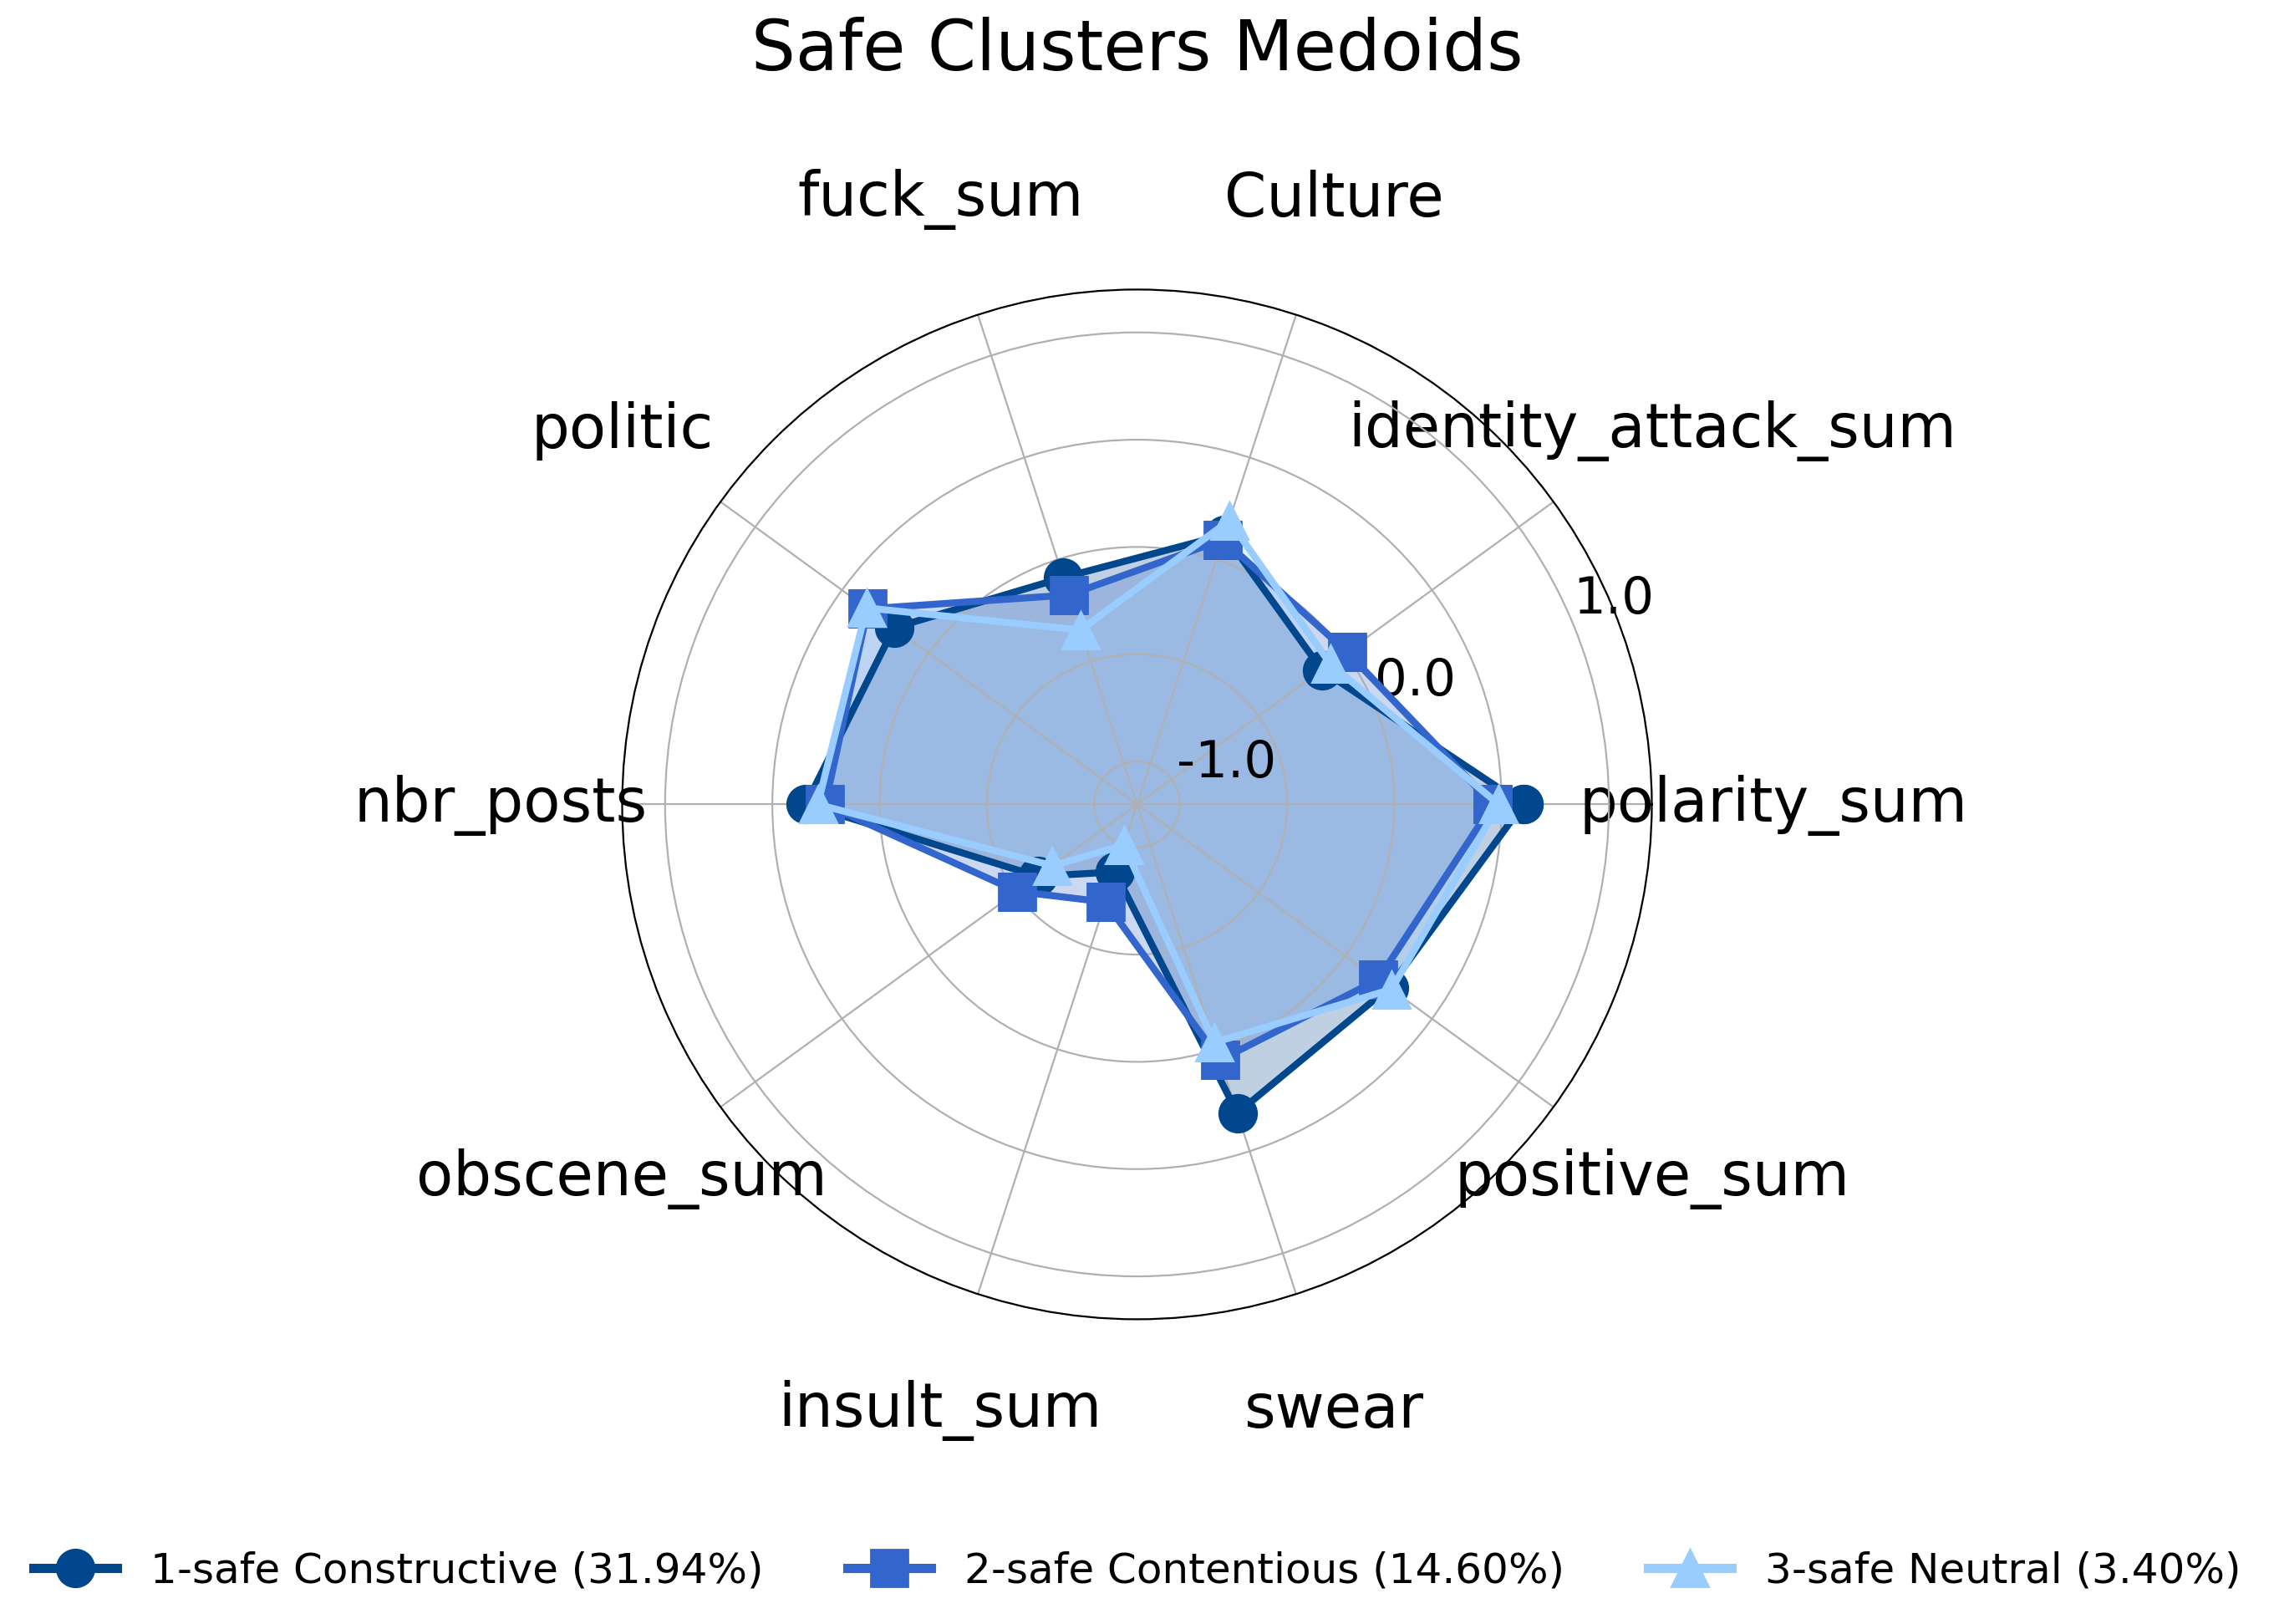

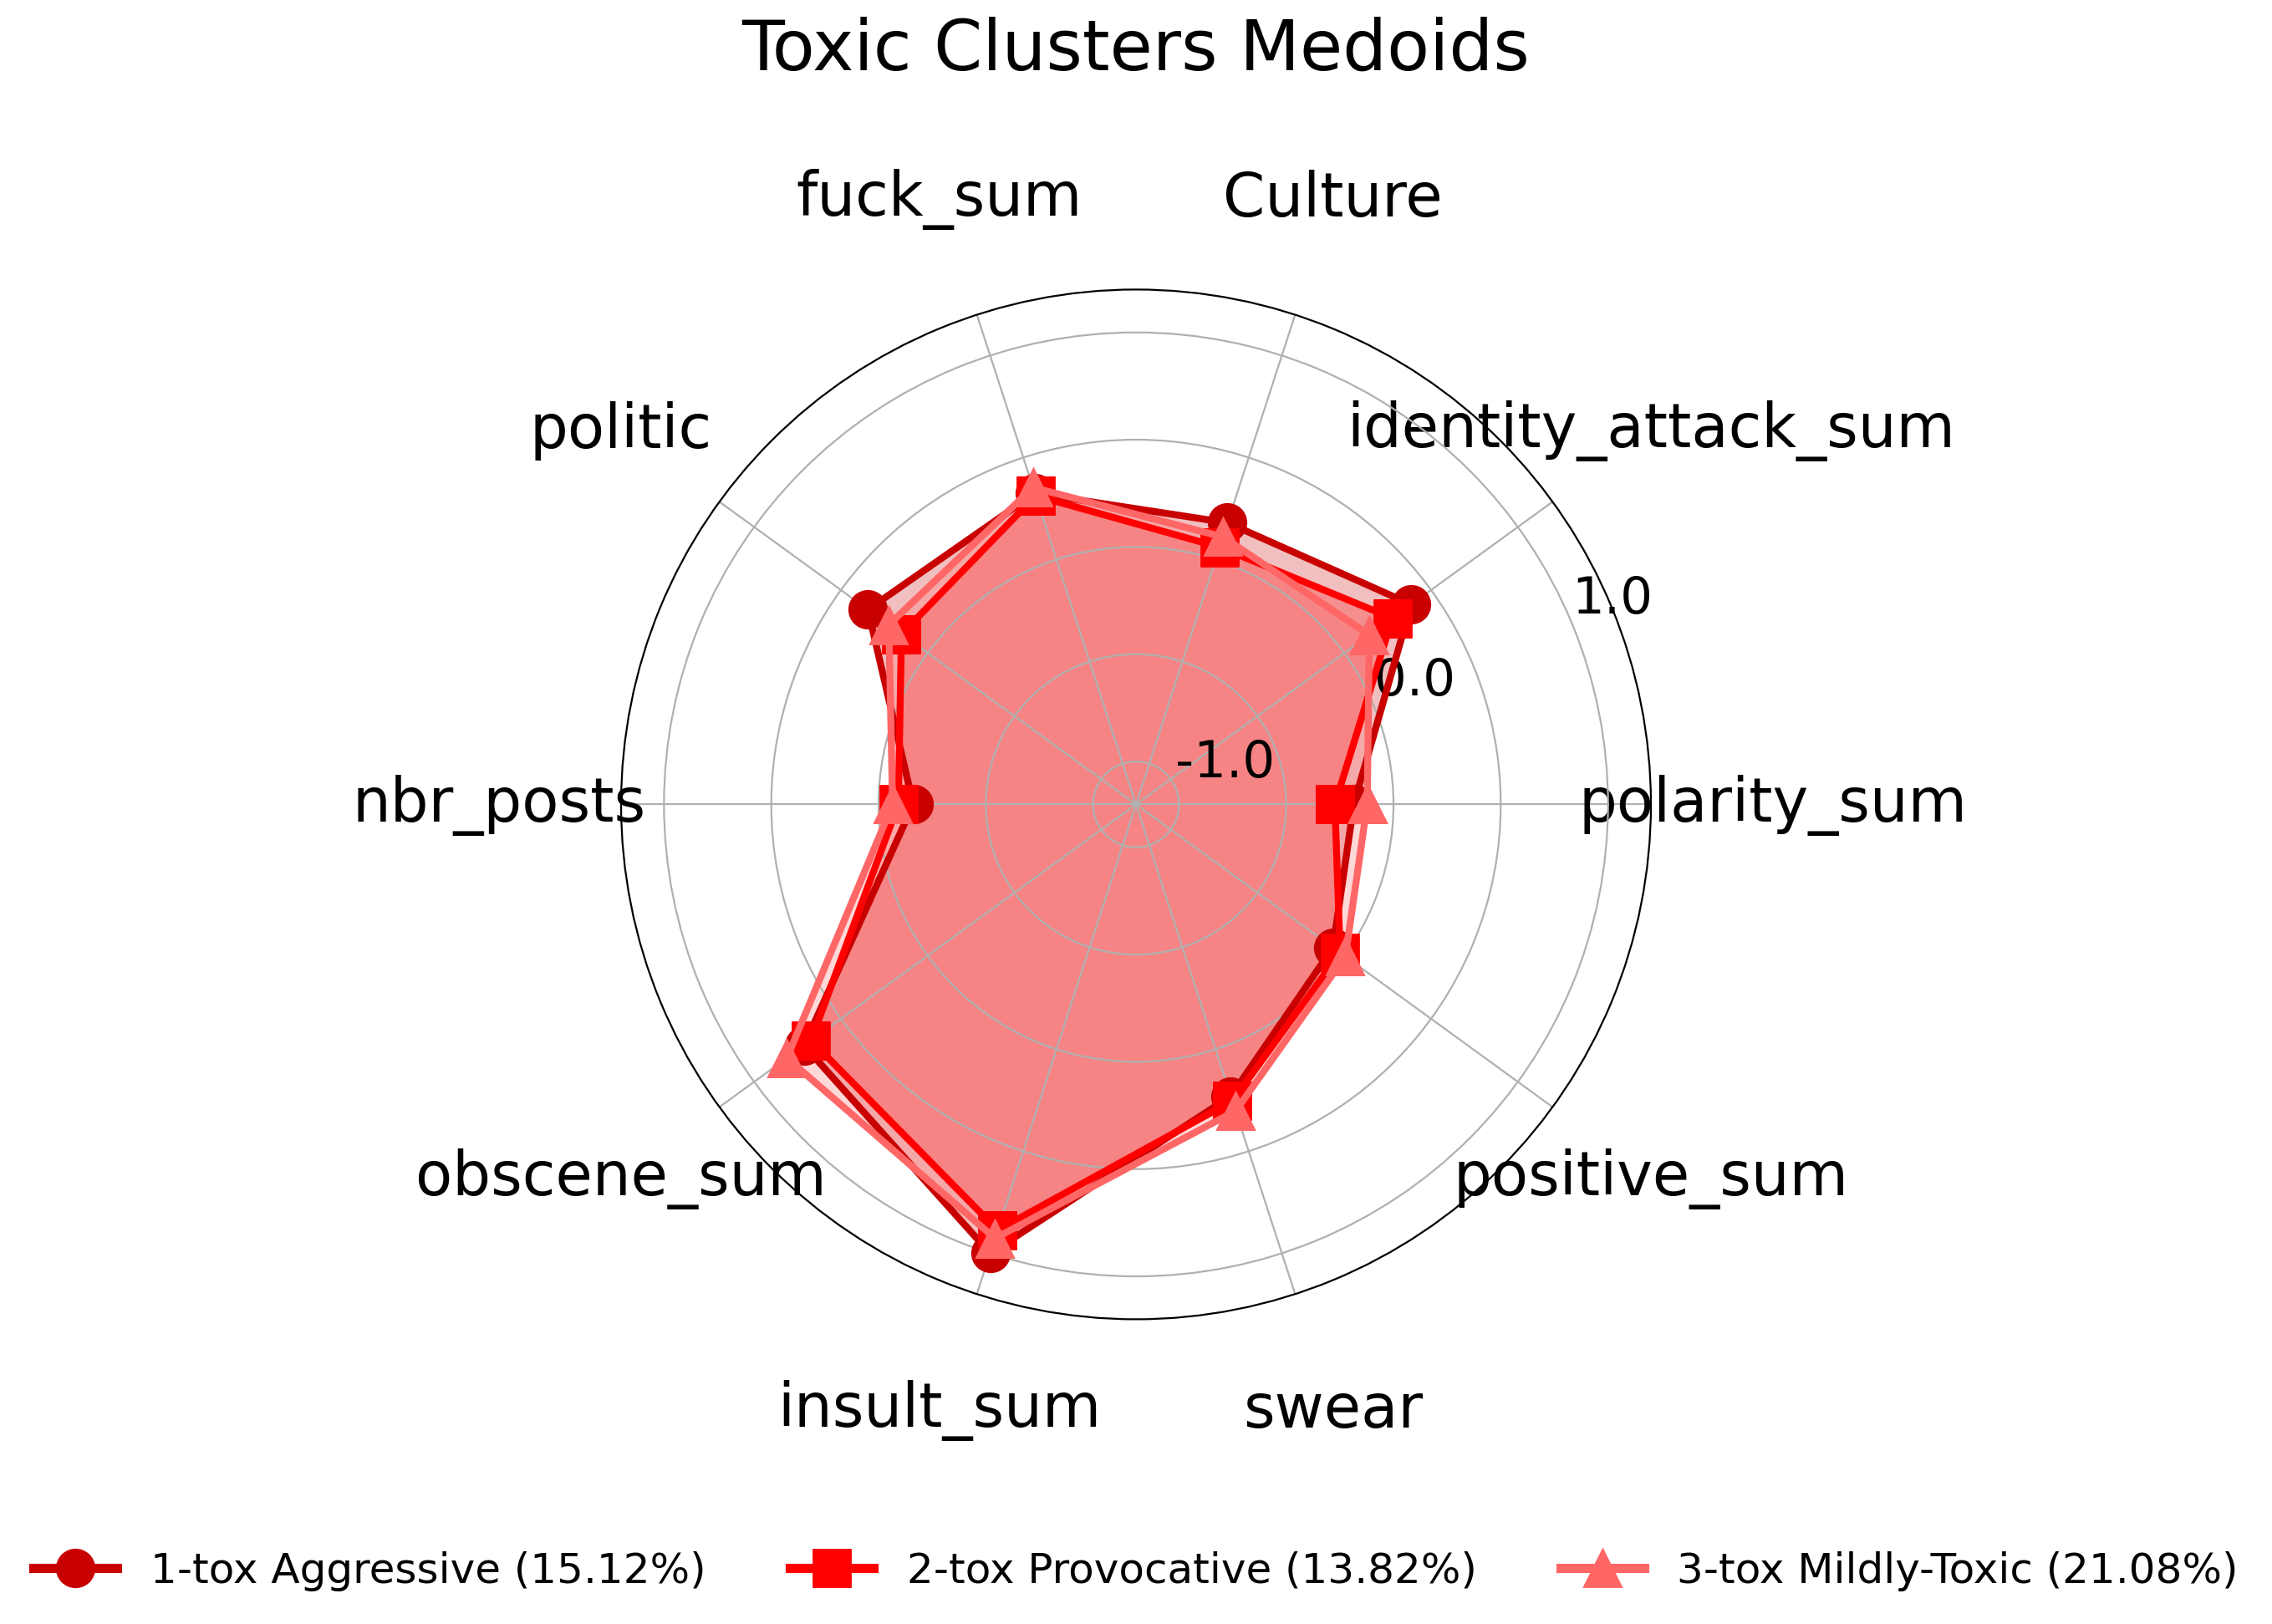

In [55]:
# Create a figure for safe data and plot it

color_safe = ['#00478E', '#3366cc', '#99ccff']
color_toxic = ['#C80000', '#ff0000', '#ff6666']



fig_safe, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=200, subplot_kw={'projection': 'polar'})
radar_chart(data_safe_reordered, color_safe, "Safe Clusters Medoids", ax1, cluster_names_safe)

# Save the figure for safe data as a high-quality PNG image
#fig_safe.savefig('safe_clusters_medoids_intersect_emotion_normalized.png', dpi=300, bbox_inches='tight')

# Create a figure for toxic data and plot it
fig_toxic, ax2 = plt.subplots(1, 1, figsize=(16, 8), dpi=200, subplot_kw={'projection': 'polar'})
radar_chart(data_tox_reordered, color_toxic, "Toxic Clusters Medoids", ax2,cluster_names_toxic)

# Save the figure for toxic data as a high-quality PNG image
#fig_toxic.savefig('toxic_clusters_medoids_intersect_emotion_normalized.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Emotion radar plot analysis

In [56]:
emotions = ['fear', 'anger', 'joy', 'trust', 'anticipation', 'surprise', 'sadness', 'disgust','dominance','valence','arousal']

In [57]:
cluster_scores_intercept_safe = {}
cluster_scores_intercept_toxic = {}

for i_cluster, cluster_name in enumerate(list(medoids_concat_embeddings.keys())):
    print(cluster_name)
    xai_dict = local_exp._internal_obj['specific'][i_cluster]
    scores = xai_dict['scores']
    names = xai_dict['names']
    sorted_data = sorted(zip(scores, names), key=lambda x: x[0][i_cluster], reverse=True)
    scores, names = zip(*sorted_data)

    ##addon

    names = [x for x in names if any(emotion in x for emotion in emotions)]
    #names = [x for x in names if x in global_top_feats]

    if 'saf' in cluster_name:
        cluster_scores_intercept_safe[cluster_name]  =  set(names)
    else:
        cluster_scores_intercept_toxic[cluster_name]  =  set(names)
        

    # Update the xai_dict with sorted scores and names
    #xai_dict['scores'] = list(scores)
    #xai_dict['names'] = list(names)

    # Store in cluster_scores_intercept or use as needed
    #cluster_scores_intercept[cluster_name] = xai_dict

    

0_safe
0_tox
1_safe
1_tox
2_safe
2_tox


In [58]:
intersect_safe = list(cluster_scores_intercept_safe.values())[0]
for val in list(cluster_scores_intercept_safe.values()):
    intersect_safe  = intersect_safe  |  val

intersect_toxic = list(cluster_scores_intercept_toxic.values())[0]
for val in list(cluster_scores_intercept_toxic.values()):
    intersect_toxic  = intersect_toxic | val

In [59]:
intersect_toxic = {item for item in intersect_toxic if 'fuckin' not in item}

In [60]:
intersect = intersect_toxic | intersect_safe
intersect

{'anger_sum',
 'arousal_sum',
 'disgust_sum',
 'dominance_sum',
 'fear_sum',
 'joy_sum',
 'sadness_sum',
 'surprise_sum',
 'trust_sum',
 'valence_sum'}

In [61]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np

cluster_scores_radaer = {}
for i_cluster, cluster_name in enumerate(list(medoids_concat_embeddings.keys())):
   # print(cluster_name)
    xai_dict = local_exp._internal_obj['specific'][i_cluster]
    scores = xai_dict['scores']
    names = xai_dict['names']
    #best_feat_local = {name : score[i_cluster] for name, score in zip(names,scores) if name in global_top_feats}

    #using intersect feats instead
    
    best_feat_local = {name : score[i_cluster] for name, score in zip(names,scores) if name in intersect}

    
    #best_feat_local = {k + '   ' if k == 'polarity_sum' else k: v for k, v in best_feat_local.items()}

    cluster_scores_radaer[cluster_name] = best_feat_local
        



In [62]:
best_feat_local = {name : score for name, score in zip(names,scores) if name in global_top_feats}

In [63]:
#best_feat_local

In [64]:
# Define cluster names with relative sizes
cluster_names_safe = {
    '0_safe': '1-safe Constructive 31.94%',
    '1_safe': '2-safe Contentious 14.60%',
    '2_safe': '3-safe Neutral 3.40%'
}

cluster_names_toxic = {
    '0_tox': '1-tox Aggressive 15.12%',
    '1_tox': '2-tox Provocative 13.82%',
    '2_tox': '3-tox Mildly-Toxic 21.08%'
}

# Determine the maximum string length
all_names = list(cluster_names_safe.values()) + list(cluster_names_toxic.values())
max_length = max(len(name) for name in all_names)

# Function to pad strings to the same length
def pad_to_length(name, length):
    return name.ljust(length)

# Adjust all names to have the same length
cluster_names_safe_fixed = {key: pad_to_length(value, max_length) for key, value in cluster_names_safe.items()}
cluster_names_toxic_fixed = {key: pad_to_length(value, max_length) for key, value in cluster_names_toxic.items()}

# Print to check the result
print("Safe clusters (fixed length):")
print(cluster_names_safe_fixed)
print("\nToxic clusters (fixed length):")
print(cluster_names_toxic_fixed)


Safe clusters (fixed length):
{'0_safe': '1-safe Constructive 31.94%', '1_safe': '2-safe Contentious 14.60% ', '2_safe': '3-safe Neutral 3.40%      '}

Toxic clusters (fixed length):
{'0_tox': '1-tox Aggressive 15.12%   ', '1_tox': '2-tox Provocative 13.82%  ', '2_tox': '3-tox Mildly-Toxic 21.08% '}


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Define labels for the radar plot
labels = ['nbr_posts', 'obscene_sum', 'insult_sum', 'identity_attack_sum', 'positive_sum', 
          'Culture', 'fuck_sum', 'swear', 'polarity_sum', 'politic']

# Define cluster names with relative sizes
cluster_names_safe = {
    '0_safe': '1-safe Constructive (31.94%)',
    '1_safe': '2-safe Contentious (14.60%)',
    '2_safe': '3-safe Neutral (3.40%)'
}

cluster_names_toxic = {
    '0_tox': '1-tox Aggressive (15.12%)',
    '1_tox': '2-tox Provocative (13.82%)',
    '2_tox': '3-tox Mildly-Toxic (21.08%)'
}

# Function to scale data
def scale_data_to_range(data_dict, min_val=-1.5, max_val=1.5):
    """
    Scales the values in the dictionary to a specific range [-1.5, 1.5].
    """
    all_values = [value for sub_dict in data_dict.values() for value in sub_dict.values()]
    global_min, global_max = min(all_values), max(all_values)
    
    scaled_dict = {}
    for outer_key, inner_dict in data_dict.items():
        scaled_dict[outer_key] = {
            key: ((val - global_min) / (global_max - global_min)) * (max_val - min_val) + min_val
            for key, val in inner_dict.items()
        }
    return scaled_dict

# Function to format legend names
def format_legend_name(name, cluster_names):
    """
    Format the legend name using cluster names.
    """
    return cluster_names[name]

# Function to plot radar chart
def radar_chart(data_dict, color_shades, title, ax, cluster_names):
    """
    Plots a radar chart for the given dictionary of data.
    """
    categories = list(data_dict.values())[0].keys()
    N = len(categories)

    # Compute angles for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the circle

    # Define different markers
    markers = ['o', 's', '^']  # Circle, square, triangle

    for i, (key, values) in enumerate(data_dict.items()):
        # Get the values and append the first one to close the circle
        values_list = list(values.values()) + [list(values.values())[0]]
        
        # Plot the data with different markers for each line
        ax.plot(angles, values_list, color=color_shades[i], linewidth=3, linestyle='solid', 
                marker=markers[i], markersize=16, label=format_legend_name(key, cluster_names))
        ax.fill(angles, values_list, color=color_shades[i], alpha=0.25)

    # Add title, labels, and formatting
    ax.tick_params(pad=42)  # Increase the distance between tick labels and axis
    ax.set_title(title, size=30, color='black', y=1.2)  # Increase 'y' to move the title further up
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=26)
    
    yticks = np.linspace(-1.0, 1.0, 5)  # Generate 5 ticks
    selected_yticks = [yticks[0], yticks[len(yticks)//2], yticks[-1]]
    ax.set_yticks(yticks)
    yticklabels = [f"{tick:.1f}" if tick in selected_yticks else "" for tick in yticks]
    ax.set_yticklabels(yticklabels, fontsize=22)
    ax.set_ylim(-1.2, 1.2)

    # Customizing the legend
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(data_dict), 
                       frameon=False, fontsize=18)
    for line in legend.get_lines():
        line.set_linewidth(4)

# Colors
color_safe = ['#00478E', '#3366cc', '#99ccff']
color_toxic = ['#C80000', '#ff0000', '#ff6666']


In [66]:
#cluster_scores_radaer

In [67]:
data_safe_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'saf' in k})
data_tox_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'tox' in k})

In [68]:
# Define the radar plot labels
labels = ['nbr_posts', 'obscene_sum', 'insult_sum', 'identity_attack_sum', 'positive_sum', 
          'Culture', 'fuck_sum', 'swear', 'polarity_sum', 'politic']

# Define custom order for specific keys
first_group_order = ['polarity_sum','identity_attack_sum', 'Culture', 'fuck_sum', 'politic', 'nbr_posts','obscene_sum','insult_sum','swear','positive_sum']

def reorder_keys(data_dict, first_group_order, full_labels):
    """
    Reorders keys in the data dictionary based on a custom order, followed by remaining labels.
    """
    reordered_data = {}
    for key, sub_dict in data_dict.items():
        # Start with the custom order
        reordered_sub_dict = {}
        for k in first_group_order:
            if k in sub_dict:
                reordered_sub_dict[k] = sub_dict[k]
        
        # Append the remaining labels in their original order
        for k in full_labels:
            if k not in first_group_order and k in sub_dict:
                reordered_sub_dict[k] = sub_dict[k]
        
        reordered_data[key] = reordered_sub_dict
    return reordered_data

In [69]:
data_safe_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'saf' in k})
data_tox_reordered = ({k:v for k, v in cluster_scores_radaer.items() if 'tox' in k})

In [71]:
#data_safe_reordered

In [72]:
#data_tox_reordered

In [73]:
import numpy as np

# Combine the dictionaries
all_data = {**data_safe_reordered, **data_tox_reordered}

# Flatten the values to find the global min and max
all_values = [value for cluster in all_data.values() for value in cluster.values()]
global_min, global_max = min(all_values), max(all_values)

# Normalize all data to the range [-1, 1]
normalized_data = {
    cluster: {key: 2 * (value - global_min) / (global_max - global_min) - 1 for key, value in metrics.items()}
    for cluster, metrics in all_data.items()
}

# Separate back into two dictionaries based on the cluster names
normalized_safe_data = {k: v for k, v in normalized_data.items() if 'safe' in k}
normalized_tox_data = {k: v for k, v in normalized_data.items() if 'tox' in k}

# Now you have normalized_safe_data and normalized_tox_data with values in the range [-1, 1]


In [74]:
data_safe_reordered = normalized_safe_data
data_tox_reordered = normalized_tox_data

In [75]:
data_safe_reordered

{'0_safe': {'fear_sum': 0.5929073517841321,
  'anger_sum': -0.048004366085432904,
  'trust_sum': 1.0,
  'surprise_sum': 0.3528158594041768,
  'sadness_sum': 0.5634414461778132,
  'disgust_sum': -0.22900763915291644,
  'joy_sum': 0.5379822535403445,
  'valence_sum': 0.6873031977495248,
  'arousal_sum': 0.3272489714124036,
  'dominance_sum': 0.48009657357747537},
 '1_safe': {'fear_sum': 0.5990516354909641,
  'anger_sum': 0.24622552367099715,
  'trust_sum': 0.9074574542407219,
  'surprise_sum': 0.9110613536794374,
  'sadness_sum': 0.28573171869264957,
  'disgust_sum': -0.07666738245832905,
  'joy_sum': 0.28735226226234745,
  'valence_sum': 0.49567935390388285,
  'arousal_sum': 0.16798361069688283,
  'dominance_sum': 0.3474683611119611},
 '2_safe': {'fear_sum': 0.47789384686577985,
  'anger_sum': 0.15063881347211505,
  'trust_sum': 0.8288477478989738,
  'surprise_sum': -0.0005517898075205752,
  'sadness_sum': 0.3274118731074944,
  'disgust_sum': -0.06835330111775373,
  'joy_sum': 0.6023723

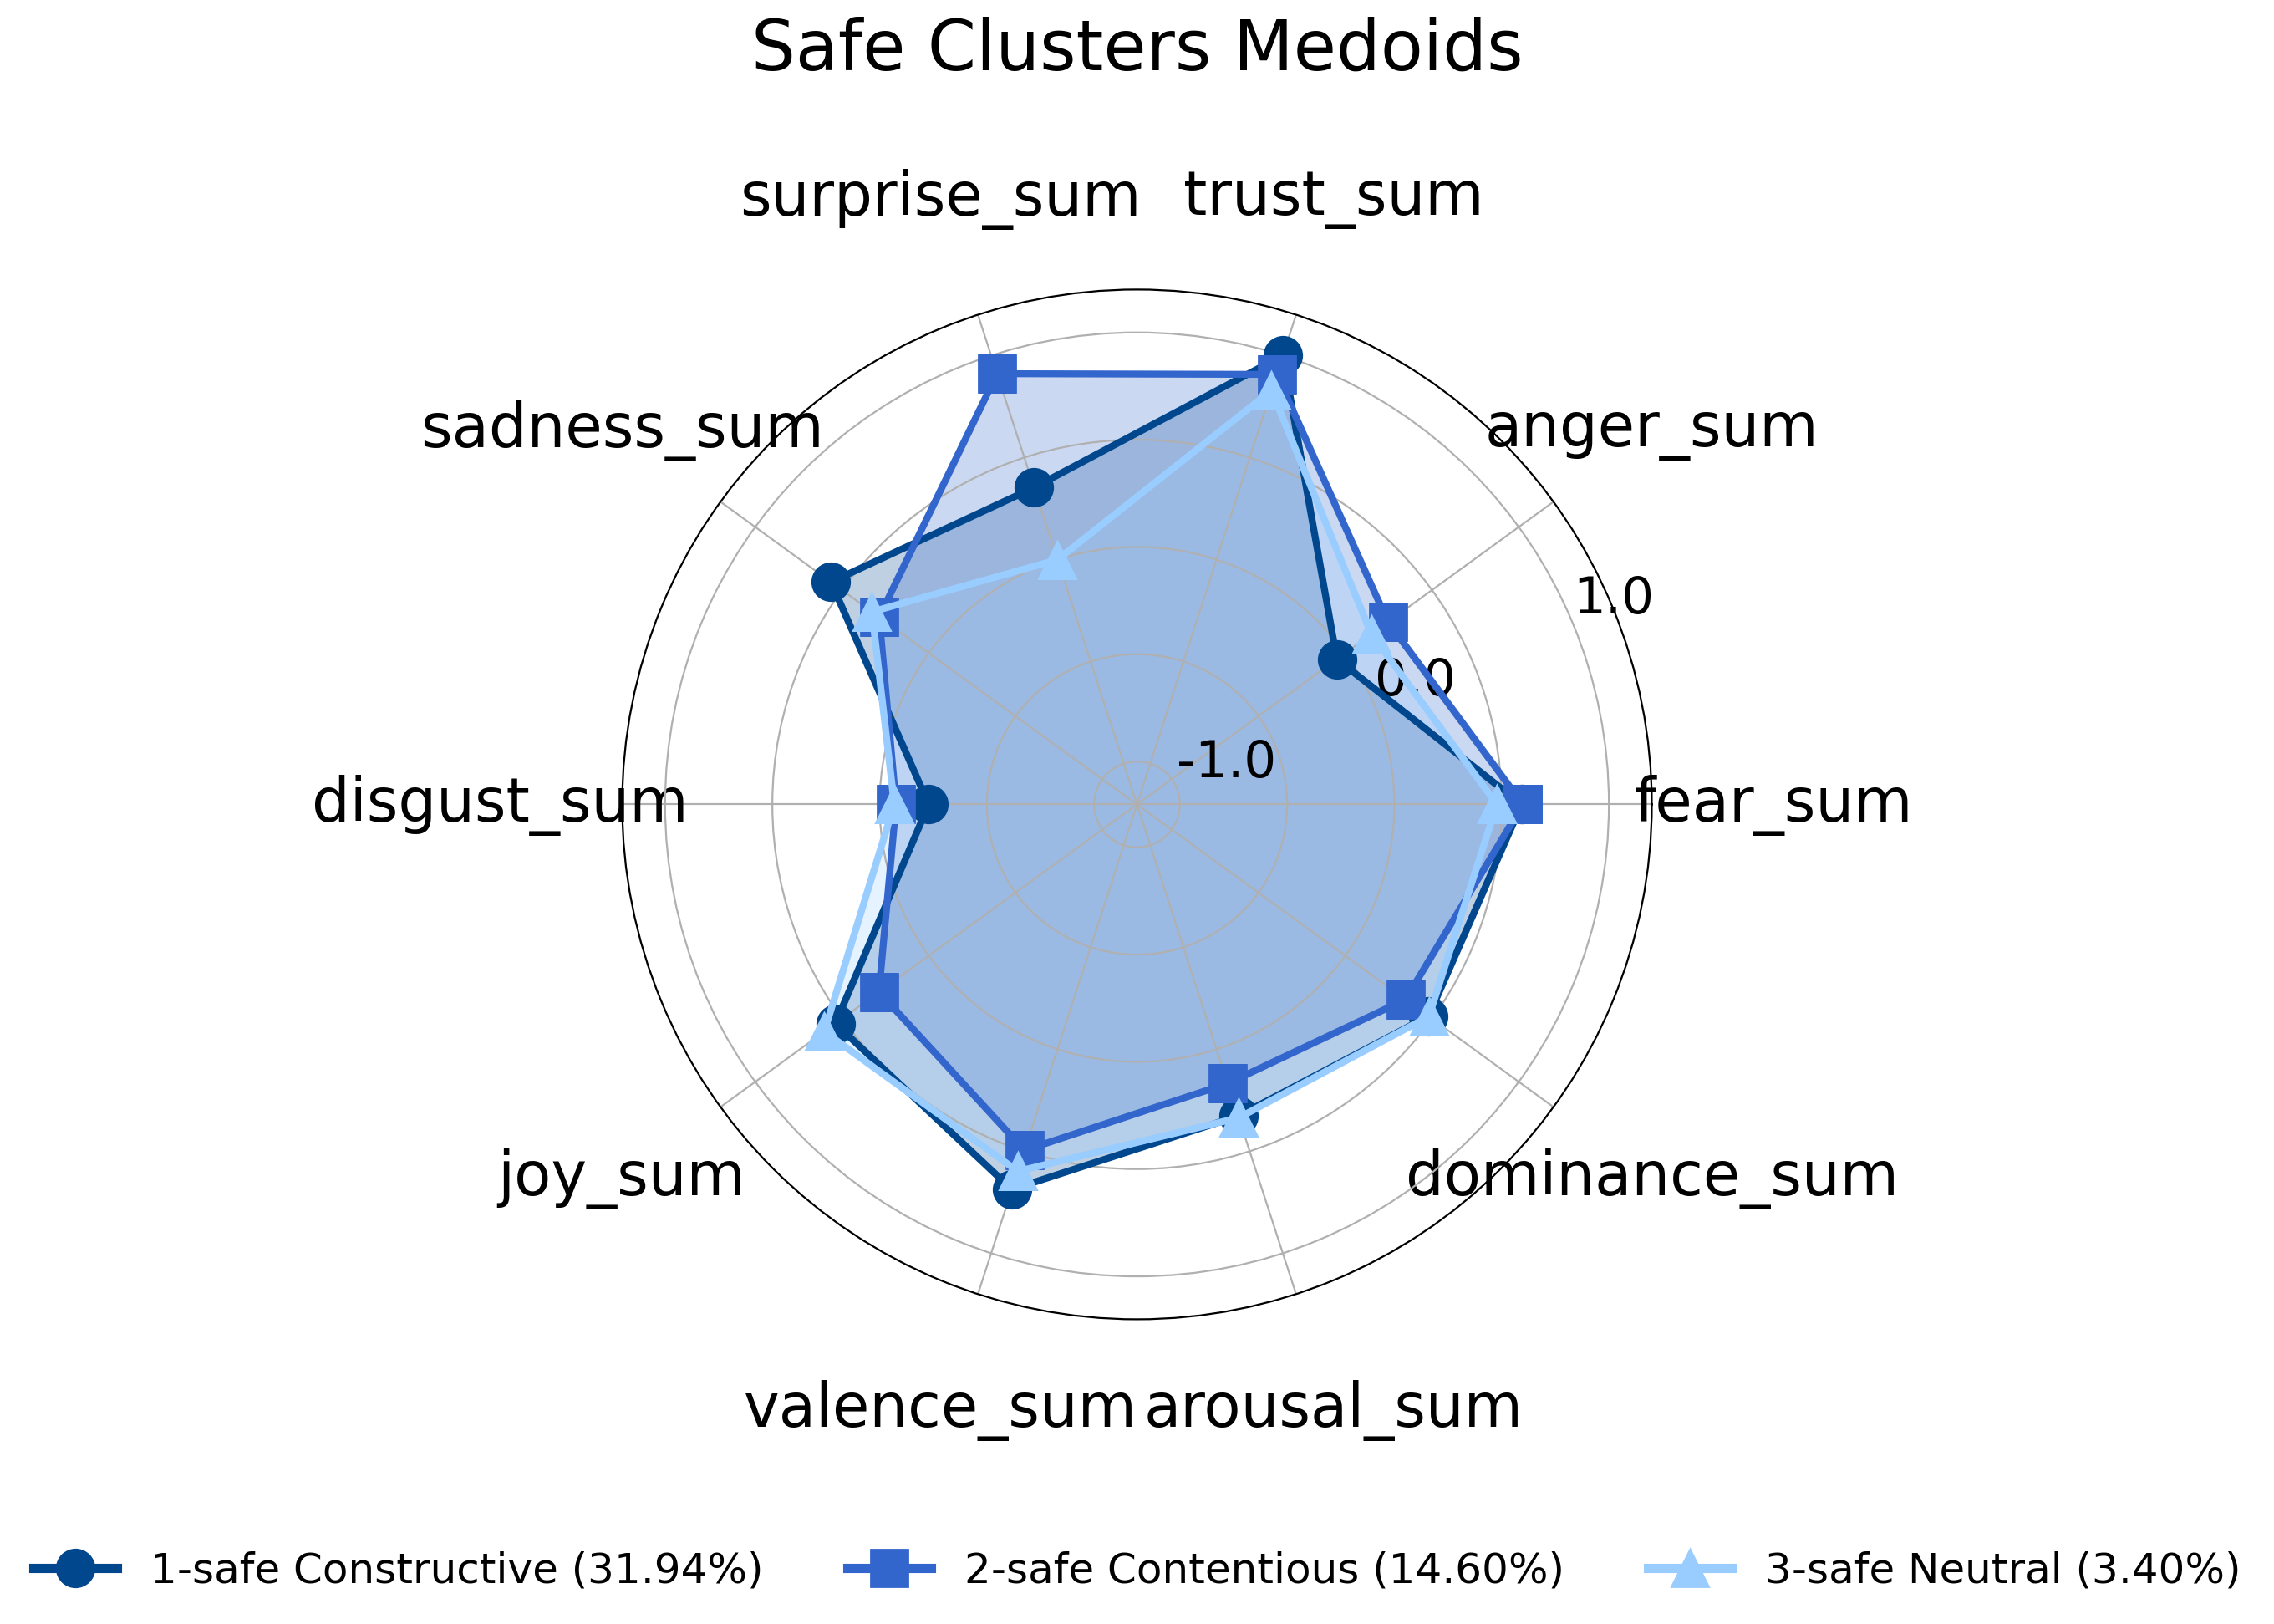

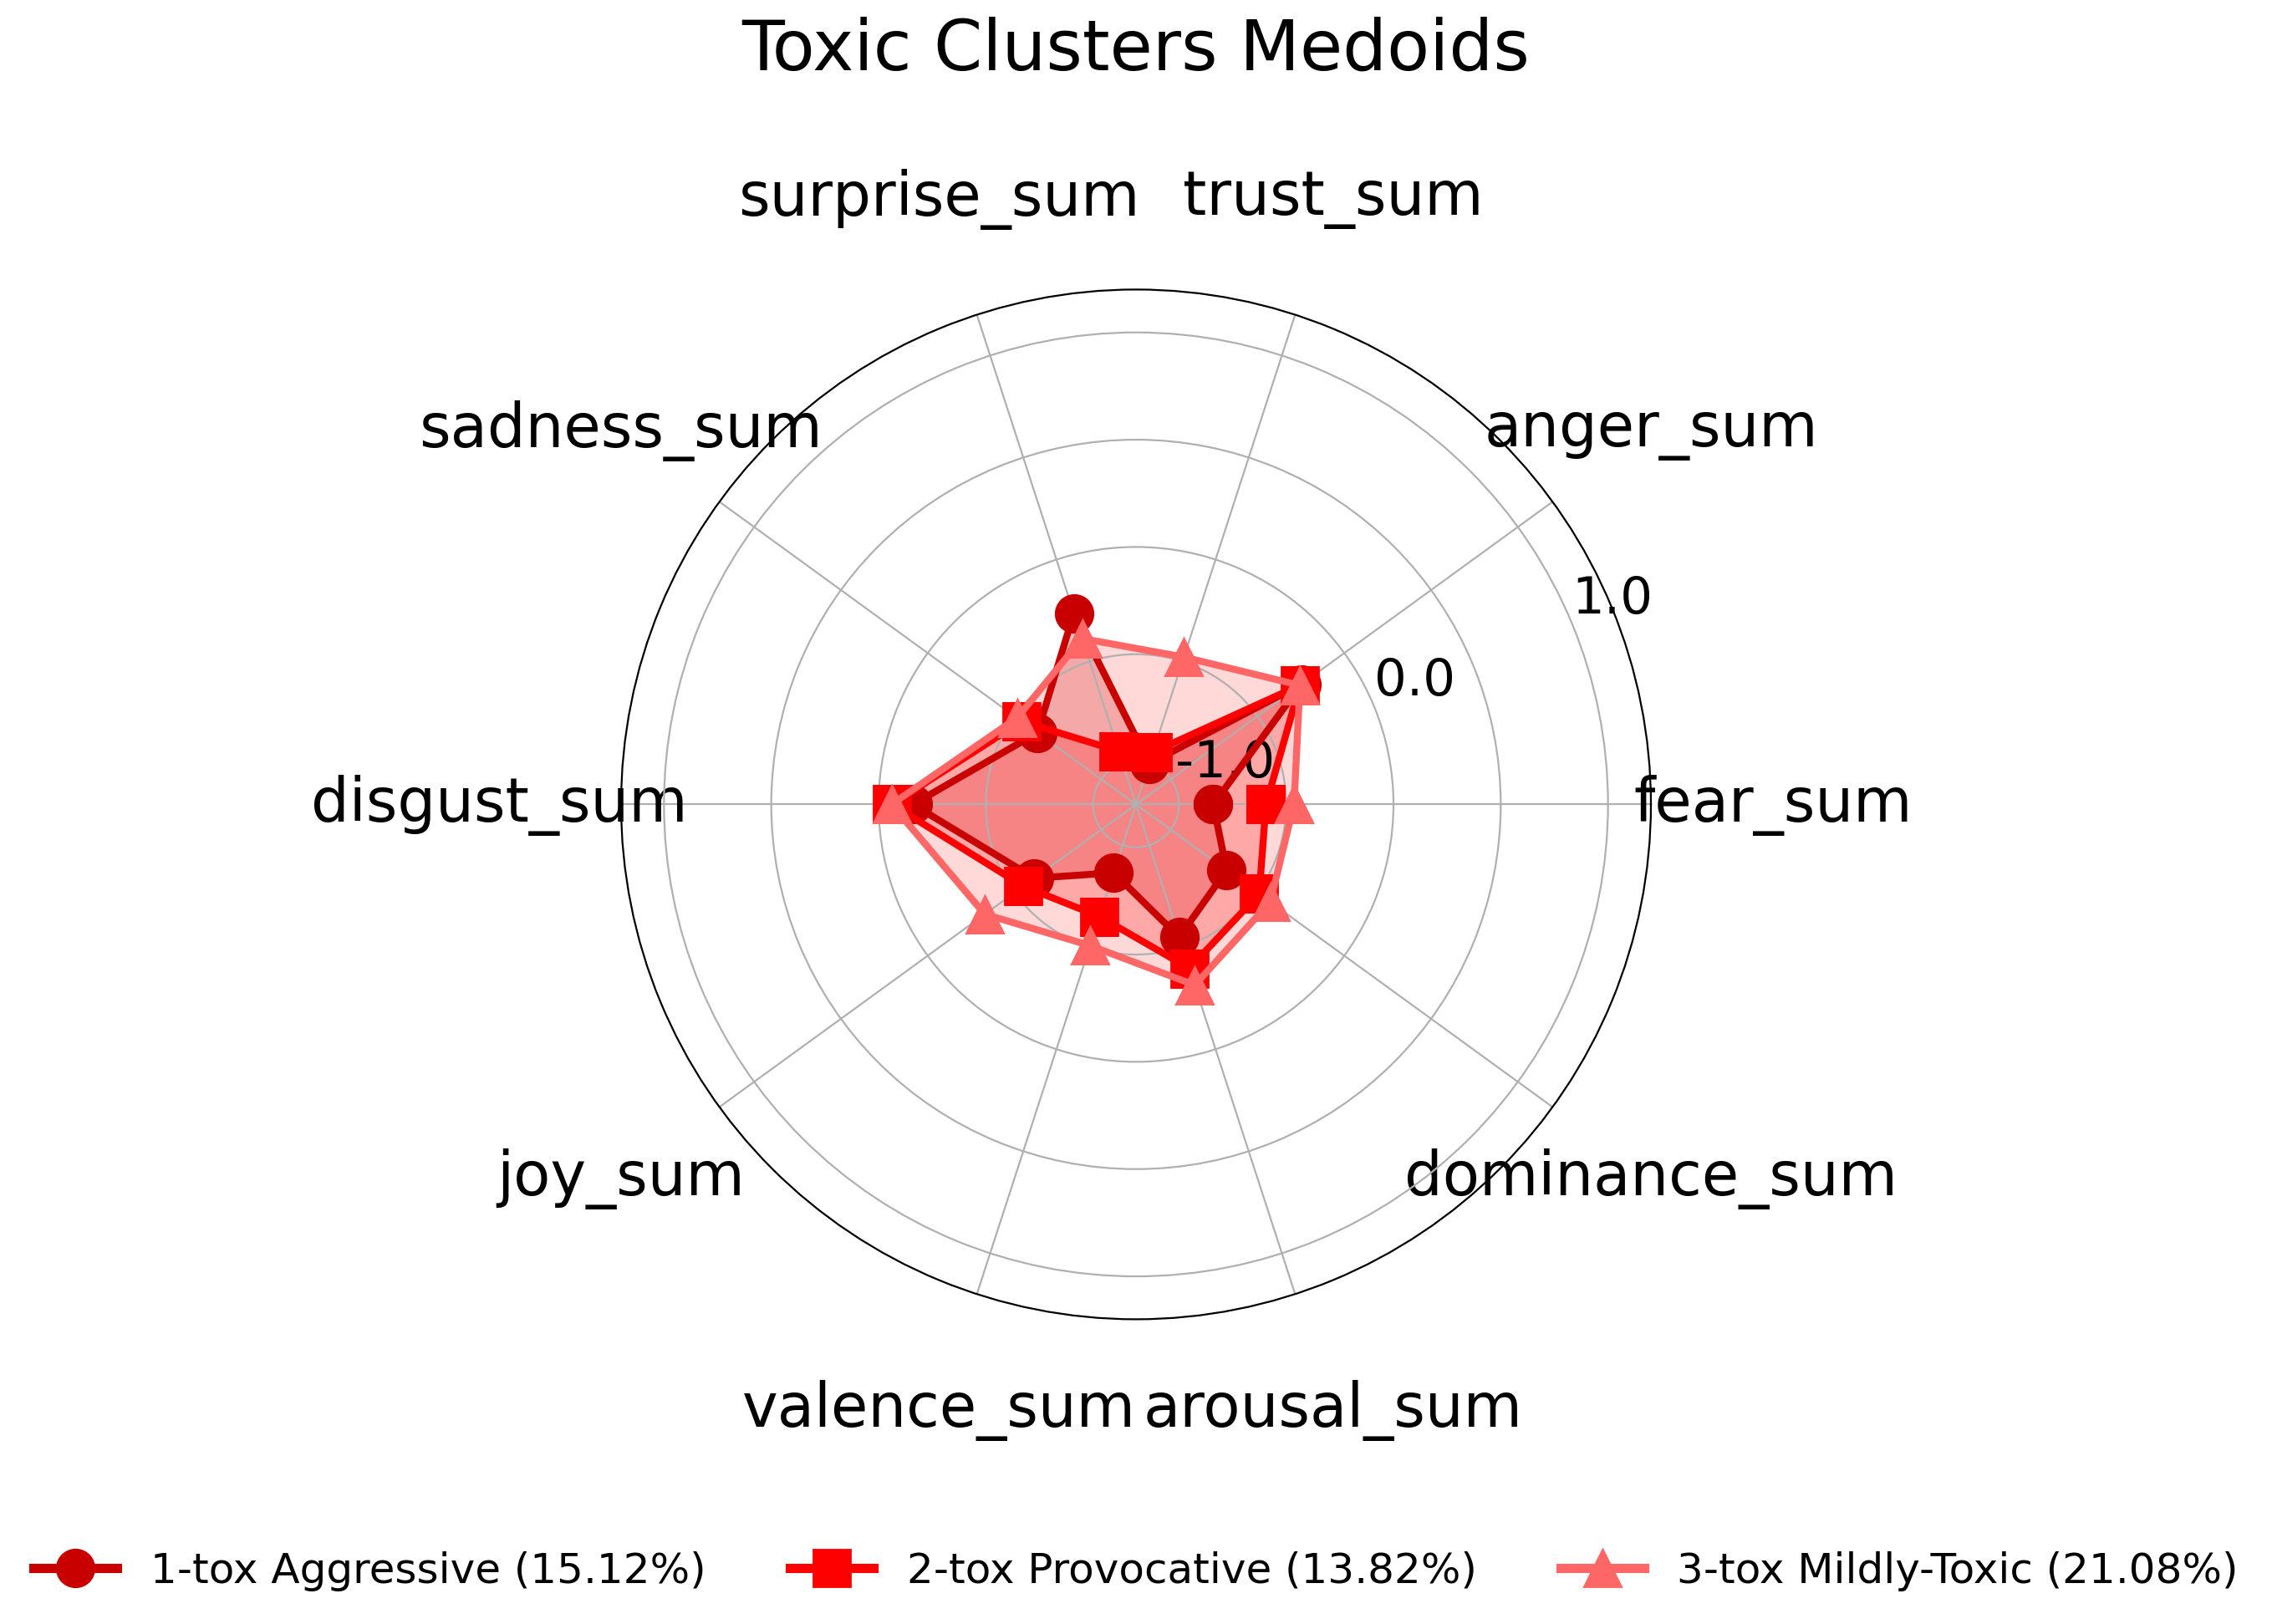

In [76]:
# Create a figure for safe data and plot it

color_safe = ['#00478E', '#3366cc', '#99ccff']
color_toxic = ['#C80000', '#ff0000', '#ff6666']



fig_safe, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=200, subplot_kw={'projection': 'polar'})
radar_chart(data_safe_reordered, color_safe, "Safe Clusters Medoids", ax1, cluster_names_safe)

# Save the figure for safe data as a high-quality PNG image
#fig_safe.savefig('safe_clusters_medoids_intersect_emotion_normalized.png', dpi=300, bbox_inches='tight')

# Create a figure for toxic data and plot it
fig_toxic, ax2 = plt.subplots(1, 1, figsize=(16, 8), dpi=200, subplot_kw={'projection': 'polar'})
radar_chart(data_tox_reordered, color_toxic, "Toxic Clusters Medoids", ax2,cluster_names_toxic)

# Save the figure for toxic data as a high-quality PNG image
#fig_toxic.savefig('toxic_clusters_medoids_intersect_emotion_normalized.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Bar Chart analysis

In [77]:
personality_data
traits = personality_data.drop(columns = ['author']).columns

In [78]:
df_pers_merg = pd.merge(personality_data, df_merged, on='author', how='inner'), on='author', how='inner')  

In [79]:
df_pers_merg = df_pers_merg[['nbr_posts','author','toxic_annotation'] + list(traits)]

In [82]:
toxic_labels = np.array(df_merged.toxic_annotation)
y = toxic_labels
y_binarized = np.array(['non-toxicity' if x == 'non-toxicity' else 'toxic' for x in y])
y = y_binarized

In [83]:
df_pers_merg['TOXICITY'] = y

In [84]:
df_pers_merg

,nbr_posts,author,toxic_annotation,long_neuroticism,long_extraversion,long_openness,long_agreeableness,long_conscientiousness,TOXICITY
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic
1,336,t2_101gwc,non-toxicity,0,0,0,0,0,non-toxicity
2,558,t2_101nfp,non-toxicity,0,0,4,3,0,non-toxicity
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic
...,...,...,...,...,...,...,...,...,...
15643,1072,t2_zykuy,vulgarity,4,3,2,0,0,toxic
15644,1231,t2_zyq04,non-toxicity,2,0,0,0,4,non-toxicity
15645,35,t2_zzfwi,non-toxicity,4,1,4,0,0,non-toxicity
15646,1320,t2_zzrbf,vulgarity,3,3,4,0,1,toxic


In [85]:
toxic_authors = df_pers_merg[df_pers_merg.TOXICITY == 'toxic']
safe_authors =  df_pers_merg[df_pers_merg.TOXICITY == 'non-toxicity']

In [86]:
toxic_authors

,nbr_posts,author,toxic_annotation,long_neuroticism,long_extraversion,long_openness,long_agreeableness,long_conscientiousness,TOXICITY
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic
7,1910,t2_102q28,vulgarity,4,0,2,2,0,toxic
8,1669,t2_102q4l,vulgarity,0,4,2,4,3,toxic
...,...,...,...,...,...,...,...,...,...
15640,874,t2_zxwos,vulgarity,0,1,2,0,0,toxic
15641,328,t2_zyj2s,vulgarity,2,1,4,0,4,toxic
15642,115,t2_zyj69,vulgarity,3,3,2,3,0,toxic
15643,1072,t2_zykuy,vulgarity,4,3,2,0,0,toxic


In [87]:
df_clustering_name = pd.read_csv('xmeans_folder_clustering/xmeans_TOXIC_NON_TOXIC_DIVISION_embeddings_CONCAT_3_LABELS.csv').drop(columns = ['Unnamed: 0'])

In [88]:
toxic_authors['CLUSTER'] = list(df_clustering_name[df_clustering_name.TOXICITY == 'toxic']['CLUSTER'])
safe_authors['CLUSTER'] = list(df_clustering_name[df_clustering_name.TOXICITY == 'non-toxicity']['CLUSTER'])

# Rename columns in toxic_authors DataFrame
toxic_authors.rename(columns={
    'long_neuroticism': 'Neurot.',
    'long_extraversion': 'Extra.',
    'long_openness': 'Openn.',
    'long_agreeableness': 'Agree.',
    'long_conscientiousness': 'Consc.'
}, inplace=True)


# Rename columns in toxic_authors DataFrame
safe_authors.rename(columns={
    'long_neuroticism': 'Neurot.',
    'long_extraversion': 'Extra.',
    'long_openness': 'Openn.',
    'long_agreeableness': 'Agree.',
    'long_conscientiousness': 'Consc.'
}, inplace=True)


toxic_authors['CLUSTER'] = toxic_authors['CLUSTER'].map({'0_tox': '1-tox', '1_tox': '2-tox', '2_tox': '3-tox'})
toxic_authors['CLUSTER'] = pd.Categorical(toxic_authors['CLUSTER'], categories=['1-tox', '2-tox', '3-tox'], ordered=True)


safe_authors['CLUSTER'] = safe_authors['CLUSTER'].map({'0_safe': '1-safe', '1_safe': '2-safe', '2_safe': '3-safe'})
safe_authors['CLUSTER'] = pd.Categorical(safe_authors['CLUSTER'], categories=['1-safe', '2-safe', '3-safe'], ordered=True)

# Mapping of short trait names to full trait names
traits_dict = {
    'Neurot.': 'Neuroticism',
    'Extra.': 'Extraversion',
    'Openn.': 'Openness',
    'Agree.': 'Agreeableness',
    'Consc.': 'Conscientiousness'
}


/tmp/ipykernel_475279/3886299593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_475279/3886299593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_475279/3886299593.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_475279/3886299593.py:15: SettingWithCopyWarning:


A va

In [89]:
toxic_authors.head()

,nbr_posts,author,toxic_annotation,Neurot.,Extra.,Openn.,Agree.,Consc.,TOXICITY,CLUSTER
0,3,t2_100w5k,vulgarity,4,0,2,4,3,toxic,3-tox
3,13,t2_1023m3xz,vulgarity,4,0,4,0,2,toxic,2-tox
4,141,t2_102eed5v,harassment,4,0,4,3,0,toxic,1-tox
7,1910,t2_102q28,vulgarity,4,0,2,2,0,toxic,3-tox
8,1669,t2_102q4l,vulgarity,0,4,2,4,3,toxic,3-tox


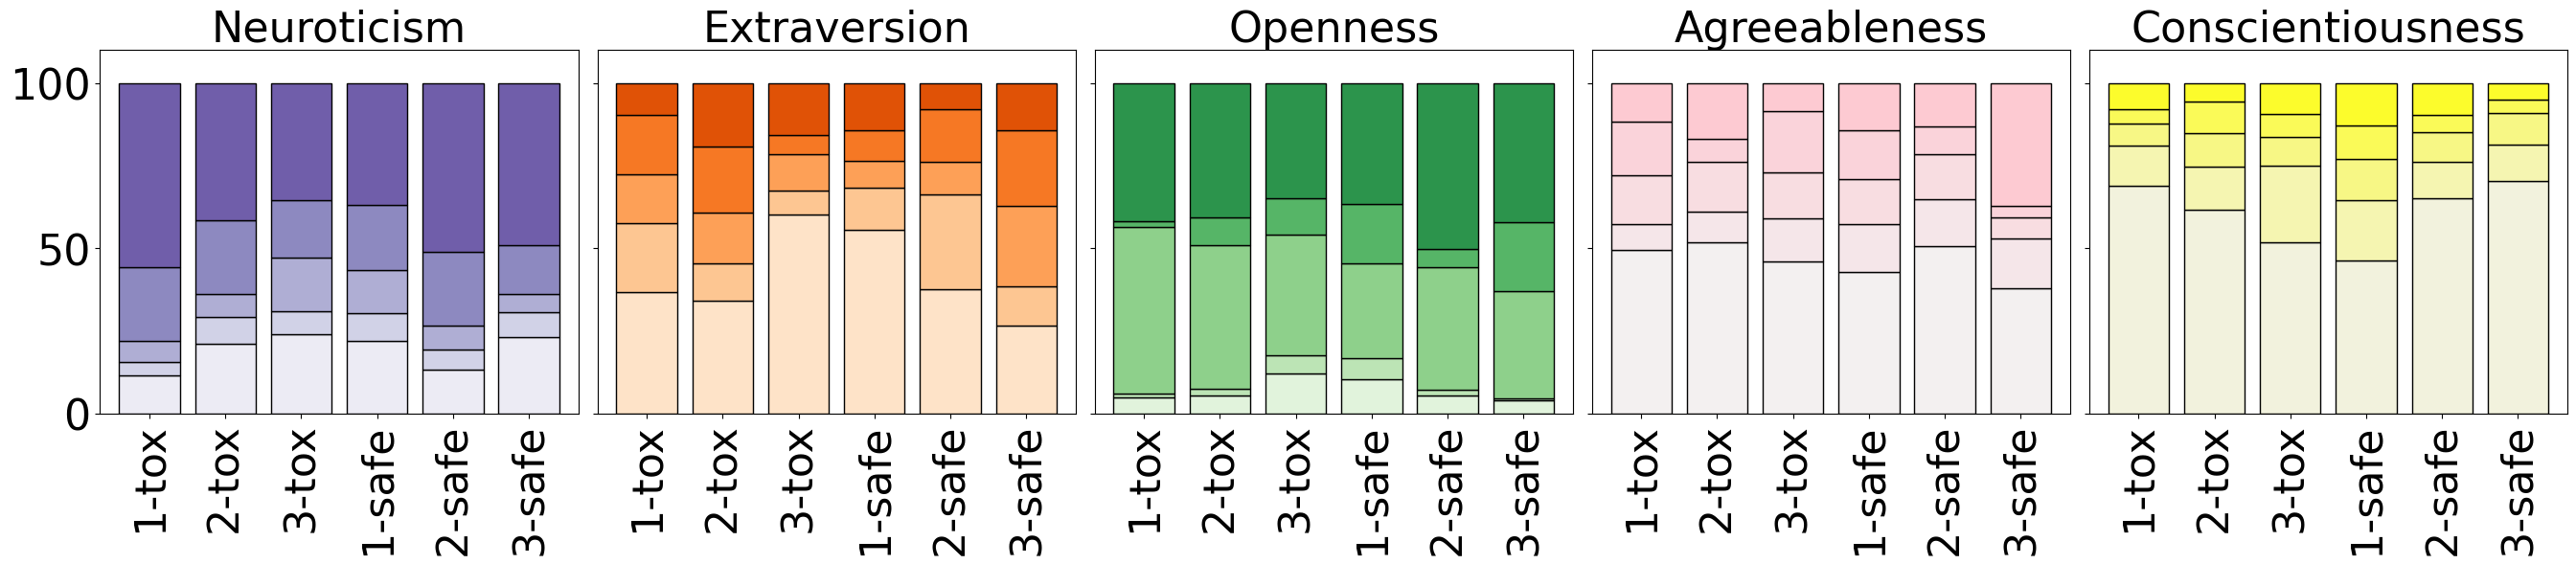

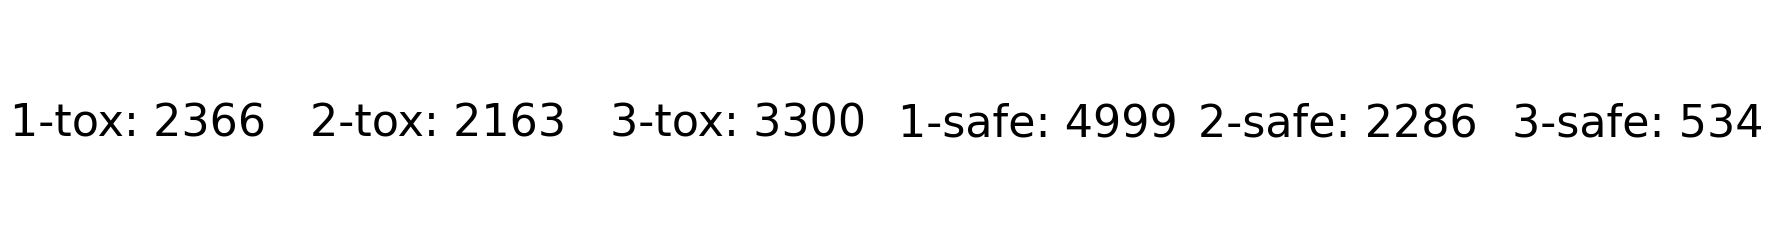

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the trait labels
traits = ['Neurot.', 'Extra.', 'Openn.', 'Agree.', 'Consc.']
clusters = ['1-tox', '2-tox', '3-tox', '1-safe', '2-safe', '3-safe']  # Define cluster names explicitly

traits_dict = {
    'Neurot.': 'Neuroticism',
    'Extra.': 'Extraversion',
    'Openn.': 'Openness',
    'Agree.': 'Agreeableness',
    'Consc.': 'Conscientiousness'
}

# Combine toxic and safe authors
# Assuming safe_authors and toxic_authors are already loaded as DataFrames
combined_authors = pd.concat([toxic_authors, safe_authors], ignore_index=True)

# Define a unique color palette for each trait
trait_colors = {
    'Neurot.': sns.color_palette("Purples", 6),   # Blue palette for Neuroticism
    'Extra.': sns.color_palette("Oranges", 6),  # Orange palette for Extraversion
    'Openn.': sns.color_palette("Greens", 6),   # Green palette for Openness
    'Agree.': ['#f3f0f0', '#f5e6e9', '#f8dde1', '#fad3da', '#fdcad2', '#ffc0cb'],  # Pink gradient for Agreeableness
    'Consc.': ['#f2f2dd', '#f5f5b1', '#f7f785', '#fafa58', '#fcfc2c', '#ffff00']   # Yellow gradient for Conscientiousness
}


fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(30, 6), sharey=True)  # Slightly smaller figure size

cluster_order = ['1-tox', '2-tox', '3-tox', '1-safe', '2-safe', '3-safe']

# Loop through each trait
for i, trait in enumerate(traits):
    ax = axes[i]
    
    # Melt the data for the current trait
    melted_data = combined_authors.melt(
        value_vars=[trait],
        id_vars=['CLUSTER'],
        var_name='Trait', value_name='Value'
    )
    
    total_counts = melted_data.groupby(['CLUSTER', 'Value']).size().reset_index(name='Counts')
  
    total_counts['Percentage'] = total_counts.groupby('CLUSTER')['Counts'].transform(lambda x: (x / x.sum()) * 100)
    
   
    pivot_data = total_counts.pivot_table(index='CLUSTER', columns='Value', values='Percentage', aggfunc='sum', fill_value=0)
    

    pivot_data = pivot_data.reindex(cluster_order)
    
    # Plot the stacked bar chart with black separators and fixed color for each value
    pivot_data.plot(
        kind='bar', stacked=True, ax=ax, color=trait_colors[trait], width=0.8, edgecolor='black', legend=False
    )
    
    # Set titles and labels
    ax.set_title(f"{traits_dict[trait]}", fontsize=32)
    ax.set_xlabel("", fontsize=32)
    if i == 0:
        ax.set_ylabel("", fontsize=30)
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)  # Set y-axis from 0% to 100%
    
    # Adjust the font size for ticks
    ax.tick_params(axis='both', labelsize=32)
    ax.tick_params(axis='x', rotation=90)  # Make the x-axis tick labels horizontal

# Create the manual legend for the final plot only
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette("Blues", 4)]

# Calculate the size of each cluster
cluster_sizes = combined_authors['CLUSTER'].value_counts().reindex(cluster_order)

plt.subplots_adjust(wspace=0.3)  # Reduced space between subplots

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the legends
#fig.savefig('bar_chart_traits.png', dpi=300, bbox_inches='tight', pad_inches=0.1)  # Save with best resolution

plt.show()


# Create a blank figure
fig = plt.figure(figsize=(12, 3))  # Increase the figure width

# Adjust the spacing dynamically
spacing = 1.5/ len(cluster_order)  # Spread the labels evenly across the width

# Add a fake legend below the existing one with the cluster sizes, aligned horizontally
for idx, cluster in enumerate(cluster_order):
    cluster_size = cluster_sizes.get(cluster, 0)
    # Place the text horizontally along the x-axis with adjusted spacing
    plt.text(0.2 + spacing * idx, 0.5, f"{cluster}: {cluster_size}", 
             transform=fig.transFigure, ha='center', va='center', fontsize=32, color='black')

# Adjust the layout to fit the text properly
plt.axis('off')  # Hide the axes
#fig.savefig('text_sizes.png', dpi=300, bbox_inches='tight', pad_inches=0.1)  # Save with best resolution

plt.show()

In [108]:
local_exp = exp_model.explain_local(X[[8158, 7040, 5282, 11560, 13504, 9782, 2627]], y[[8158, 7040, 5282, 11560, 13504, 9782, 2627]], 0)

In [109]:
show(local_exp)

In [ ]:
local_exp = exp_model.explain_local(X[[5822, 10051, 14924, 15416, 8484, 8613, 3491]], y[[5822, 10051, 14924, 15416, 8484, 8613, 3491]], 0)

In [ ]:
show(local_exp)

In [ ]:
clusters_pivots_explanations_scores = {}
clusters_pivots_explanations_dicts = {}

for k, indexes in clusters_pivots_embeddings.items():
    scores_dict = {}
    scores_dict_dict = {}

    print(indexes) 
    
    local_exp = exp_model.explain_local(X[list(indexes)], y[list(indexes)], 0)
    
    
    for i, index in enumerate(indexes):
        dict_score, sorted_scores = extract_info_local_exp(local_exp, index = i, label = k)
        scores_dict[index] = sorted_scores
        scores_dict_dict[index] = dict_score
        
    clusters_pivots_explanations_scores[k] = scores_dict
    clusters_pivots_explanations_dicts[k] = scores_dict_dict
        
            
        

In [ ]:
def average_attr(data):
    
    aggregated = {}

    
    for key, attributes in data.items():
        for attr, values in attributes.items():
            if attr not in aggregated:
                aggregated[attr] = []
            aggregated[attr].append(values)
    
    averages = {attr: np.mean(values, axis=0) for attr, values in aggregated.items()}
    return averages


In [ ]:
clusters_pivots_explanations_average = {key : average_attr(value) for key, value in clusters_pivots_explanations_dicts.items()}

In [ ]:
clusters_pivots_explanations_average

In [ ]:
intersect = {}
for clust, dict_score in clusters_pivots_explanations_scores.items():
    list_of_lists = [[x[0] for x in value[0:50]] for k, value in dict_score.items()]
    intersection = set(list_of_lists[0])  # Start with the first list as a set
    for lst in list_of_lists[1:]:
        intersection.intersection_update(lst)  # Update intersection with each list

    print(intersection)
    intersect[clust] = intersection


In [ ]:
intersect

In [ ]:
radar_plot_values = {}
for k, intrsc in intersect.items():
    dict_els_cluster = {}
    for el in intrsc:
        dict_els_cluster[el] = clusters_pivots_explanations_average[k][el][k]
    radar_plot_values[k] = dict_els_cluster
        

In [ ]:
radar_plot_values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    0: {'n_comments_GPE': 0.1303240516639034,
        'num_unique_words_sum': 0.22147456618861977,
        'number_full_words_sum': 0.3066726789986641,
        'n_comments_ORG': 0.3069752685921017},
    1: {'toxic_words_max': -0.013309189536680577,
        'num_words_upper_mean': 0.02746367284863079,
        'politic': 0.3119855043815352,
        'n_comments_ORG': 0.03746725088913698,
        'acquire': 0.056752021026091726,
        'BigWords': 0.09819074236256387,
        'feeling': 0.00028001495448583963,
        'Culture': 0.11304154125895804,
        'i': 0.024222105876687224,
        'leisure': 0.08075579179592972,
        'Physical': -0.00018547679660658417},
    2: {'num_words_upper_mean': 0.03647646733646026,
        'politic': -0.11285079528226868,
        'money': 0.028004446513749004,
        'visual': 0.02971180819506845,
        'i': 9.671809642685023e-06,
        'sexual': 0.08485377874863498}
}

# Function to create radar plots
def plot_radar(data, title, ax):
    labels = list(data.keys())
    values = list(data.values())
    
    # Close the radar plot loop by appending the first value
    values.append(values[0])
    
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=title)
    ax.fill(angles, values, alpha=0.25)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, fontsize=14, loc='center')

# Plot radar charts for each key
fig, axs = plt.subplots(1, len(data), figsize=(18, 6), subplot_kw={'polar': True})

for i, (key, attributes) in enumerate(data.items()):
    plot_radar(attributes, f'Cluster {key + 1}', axs[i])

plt.tight_layout()
plt.show()


In [ ]:
#for cl_label in set(df_classification.CLUSTER):
#    df = df_classification[df_classification.CLUSTER == cl_label]
#    index = df.index
#    X_label = df.drop(columns = ['CLUSTER', 'TOXICITY']).values
#    y_label = np.array([toxic_dict[i] for i in df.TOXICITY])
#    print('CLUSTER', cl_label)
    
#    distance_matrix = pairwise_distances(X_label, metric='euclidean')


#    ruletree = RuleTreeClassifier(
#                   max_depth=3,
#                    distance_matrix=distance_matrix,
#                   distance_measure='euclidean',
#                    random_state=42,
#                    splitter='best', 
#                    stump_selection='best',
#                    base_stump=[pt_stump]
#                )
#    ruletree.fit(X_label, y_label)
#    pivots = extract_pivs(ruletree.root)
#    print(index[pivots['used']])

#    clusters_pivots_interpretable_feats[cl_label] = tuple(index[pivots['used']])
        
        